In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import npts

DATA_DIR = 'data/'

## (Down)load SFO weather data 

In [171]:
# import urllib.request

# for year in range(1987, 2019):
#     print(f"Downloading data for year {year}")
#     urllib.request.urlretrieve(f"https://www.ncei.noaa.gov/data/global-hourly/access/{year}/72494023234.csv", 
#                                DATA_DIR + f"{year}-SFO-weather.csv")

def load_year(year):
    ## Look at the document in DATA_DIR for spec.
    data=pd.read_csv(DATA_DIR+f'{year}-SFO-weather.csv.gz', usecols=[1,13])
    data.index = pd.to_datetime(data.DATE, format='%Y-%m-%dT%H:%M:%S')
    data = data.dropna()
    data['temp'] = data.TMP.apply(lambda el: float(el.split(',')[0])/10.)
    data['qual_code'] = data.TMP.apply(lambda el: (el.split(',')[1]))
    # time zone
    import pytz
    pacific = pytz.timezone('US/Pacific')
    data.index = data.index.tz_localize(pytz.utc).tz_convert(pacific)

    return data.temp[data.qual_code.isin(['1','5'])]

temperatures = pd.Series()
for year in range(1987, 2019):
    temperatures = temperatures.append(load_year(year))

In [172]:
test = temperatures[-len(temperatures)//5:]
train = temperatures[:-len(temperatures)//5]

In [253]:
baseline = npts.Baseline(npts.HourOfDay(lambdas=np.logspace(-10,0, 30)), 
                         npts.DayOfYear(lambdas=np.logspace(-10,0, 30)))
baseline.fit(train)

Building baseline with 8784 =  24*366 values.
building reg matrices
Fitting on 254446 observations, of dimension 1
Train set: 203478 obs. Test set : 50968 obs.
Making quadratic loss term for 203478 obs.
Making quadratic loss term for 50968 obs.
Provided lambdas: [array([1.00000000e-10, 2.21221629e-10, 4.89390092e-10, 1.08263673e-09,
       2.39502662e-09, 5.29831691e-09, 1.17210230e-08, 2.59294380e-08,
       5.73615251e-08, 1.26896100e-07, 2.80721620e-07, 6.21016942e-07,
       1.37382380e-06, 3.03919538e-06, 6.72335754e-06, 1.48735211e-05,
       3.29034456e-05, 7.27895384e-05, 1.61026203e-04, 3.56224789e-04,
       7.88046282e-04, 1.74332882e-03, 3.85662042e-03, 8.53167852e-03,
       1.88739182e-02, 4.17531894e-02, 9.23670857e-02, 2.04335972e-01,
       4.52035366e-01, 1.00000000e+00]), array([1.00000000e-10, 2.21221629e-10, 4.89390092e-10, 1.08263673e-09,
       2.39502662e-09, 5.29831691e-09, 1.17210230e-08, 2.59294380e-08,
       5.73615251e-08, 1.26896100e-07, 2.80721620e-07, 6

CG took 0.0027191638946533203 seconds.
(50968, 1)
(203478, 1)
Tr. cost: 5.668e+00, val. cost: 5.750e+00
working with lambda (2.2122162910704502e-10, 0.0017433288221999908)
solving with λ=(2.2122162910704502e-10, 0.0017433288221999908)
CG took 0.0036051273345947266 seconds.
(50968, 1)
(203478, 1)
Tr. cost: 5.694e+00, val. cost: 5.747e+00
working with lambda (2.2122162910704502e-10, 0.0038566204211634724)
solving with λ=(2.2122162910704502e-10, 0.0038566204211634724)
CG took 0.0052032470703125 seconds.
(50968, 1)
(203478, 1)
Tr. cost: 5.719e+00, val. cost: 5.750e+00
working with lambda (2.2122162910704502e-10, 0.008531678524172814)
solving with λ=(2.2122162910704502e-10, 0.008531678524172814)
CG took 0.010807037353515625 seconds.
(50968, 1)
(203478, 1)
Tr. cost: 5.744e+00, val. cost: 5.760e+00
working with lambda (2.2122162910704502e-10, 0.018873918221350997)
solving with λ=(2.2122162910704502e-10, 0.018873918221350997)
CG took 0.017301082611083984 seconds.
(50968, 1)
(203478, 1)
Tr. cos

CG took 0.027691125869750977 seconds.
(50968, 1)
(203478, 1)
Tr. cost: 6.114e+00, val. cost: 6.108e+00
working with lambda (4.893900918477499e-10, 0.2043359717856948)
solving with λ=(4.893900918477499e-10, 0.2043359717856948)
CG took 0.04262399673461914 seconds.
(50968, 1)
(203478, 1)
Tr. cost: 6.693e+00, val. cost: 6.686e+00
working with lambda (4.893900918477499e-10, 0.45203536563602403)
solving with λ=(4.893900918477499e-10, 0.45203536563602403)
CG took 0.03927803039550781 seconds.
(50968, 1)
(203478, 1)
Tr. cost: 7.779e+00, val. cost: 7.773e+00
working with lambda (4.893900918477499e-10, 1.0)
solving with λ=(4.893900918477499e-10, 1.0)
CG took 0.05167698860168457 seconds.
(50968, 1)
(203478, 1)
Tr. cost: 9.175e+00, val. cost: 9.171e+00
working with lambda (1.0826367338740564e-09, 1e-10)
solving with λ=(1.0826367338740564e-09, 1e-10)
CG took 0.0014400482177734375 seconds.
(50968, 1)
(203478, 1)
Tr. cost: 5.542e+00, val. cost: 6.017e+00
working with lambda (1.0826367338740564e-09, 2.

CG took 0.004090070724487305 seconds.
(50968, 1)
(203478, 1)
Tr. cost: 5.694e+00, val. cost: 5.747e+00
working with lambda (2.395026619987491e-09, 0.0038566204211634724)
solving with λ=(2.395026619987491e-09, 0.0038566204211634724)
CG took 0.005278110504150391 seconds.
(50968, 1)
(203478, 1)
Tr. cost: 5.719e+00, val. cost: 5.750e+00
working with lambda (2.395026619987491e-09, 0.008531678524172814)
solving with λ=(2.395026619987491e-09, 0.008531678524172814)
CG took 0.009028911590576172 seconds.
(50968, 1)
(203478, 1)
Tr. cost: 5.744e+00, val. cost: 5.760e+00
working with lambda (2.395026619987491e-09, 0.018873918221350997)
solving with λ=(2.395026619987491e-09, 0.018873918221350997)
CG took 0.015945911407470703 seconds.
(50968, 1)
(203478, 1)
Tr. cost: 5.783e+00, val. cost: 5.788e+00
working with lambda (2.395026619987491e-09, 0.04175318936560409)
solving with λ=(2.395026619987491e-09, 0.04175318936560409)
CG took 0.019819974899291992 seconds.
(50968, 1)
(203478, 1)
Tr. cost: 5.874e+00

CG took 0.0004057884216308594 seconds.
(50968, 1)
(203478, 1)
Tr. cost: 5.542e+00, val. cost: 6.016e+00
working with lambda (1.1721022975334793e-08, 2.395026619987491e-09)
solving with λ=(1.1721022975334793e-08, 2.395026619987491e-09)
CG took 0.0003762245178222656 seconds.
(50968, 1)
(203478, 1)
Tr. cost: 5.542e+00, val. cost: 6.016e+00
working with lambda (1.1721022975334793e-08, 5.298316906283702e-09)
solving with λ=(1.1721022975334793e-08, 5.298316906283702e-09)
CG took 0.00034999847412109375 seconds.
(50968, 1)
(203478, 1)
Tr. cost: 5.542e+00, val. cost: 6.016e+00
working with lambda (1.1721022975334793e-08, 1.1721022975334793e-08)
solving with λ=(1.1721022975334793e-08, 1.1721022975334793e-08)
CG took 0.0003018379211425781 seconds.
(50968, 1)
(203478, 1)
Tr. cost: 5.542e+00, val. cost: 6.016e+00
working with lambda (1.1721022975334793e-08, 2.592943797404667e-08)
solving with λ=(1.1721022975334793e-08, 2.592943797404667e-08)
CG took 0.0003612041473388672 seconds.
(50968, 1)
(203478

CG took 0.0010559558868408203 seconds.
(50968, 1)
(203478, 1)
Tr. cost: 5.542e+00, val. cost: 5.991e+00
working with lambda (2.592943797404667e-08, 6.723357536499335e-06)
solving with λ=(2.592943797404667e-08, 6.723357536499335e-06)
CG took 0.0011909008026123047 seconds.
(50968, 1)
(203478, 1)
Tr. cost: 5.544e+00, val. cost: 5.966e+00
working with lambda (2.592943797404667e-08, 1.4873521072935119e-05)
solving with λ=(2.592943797404667e-08, 1.4873521072935119e-05)
CG took 0.0009248256683349609 seconds.
(50968, 1)
(203478, 1)
Tr. cost: 5.549e+00, val. cost: 5.926e+00
working with lambda (2.592943797404667e-08, 3.290344562312671e-05)
solving with λ=(2.592943797404667e-08, 3.290344562312671e-05)
CG took 0.0010731220245361328 seconds.
(50968, 1)
(203478, 1)
Tr. cost: 5.562e+00, val. cost: 5.876e+00
working with lambda (2.592943797404667e-08, 7.27895384398316e-05)
solving with λ=(2.592943797404667e-08, 7.27895384398316e-05)
CG took 0.0010249614715576172 seconds.
(50968, 1)
(203478, 1)
Tr. co

CG took 0.010149002075195312 seconds.
(50968, 1)
(203478, 1)
Tr. cost: 5.744e+00, val. cost: 5.760e+00
working with lambda (5.736152510448681e-08, 0.018873918221350997)
solving with λ=(5.736152510448681e-08, 0.018873918221350997)
CG took 0.015805959701538086 seconds.
(50968, 1)
(203478, 1)
Tr. cost: 5.783e+00, val. cost: 5.788e+00
working with lambda (5.736152510448681e-08, 0.04175318936560409)
solving with λ=(5.736152510448681e-08, 0.04175318936560409)
CG took 0.021071910858154297 seconds.
(50968, 1)
(203478, 1)
Tr. cost: 5.874e+00, val. cost: 5.871e+00
working with lambda (5.736152510448681e-08, 0.09236708571873885)
solving with λ=(5.736152510448681e-08, 0.09236708571873885)
CG took 0.026408910751342773 seconds.
(50968, 1)
(203478, 1)
Tr. cost: 6.114e+00, val. cost: 6.108e+00
working with lambda (5.736152510448681e-08, 0.2043359717856948)
solving with λ=(5.736152510448681e-08, 0.2043359717856948)
CG took 0.03941702842712402 seconds.
(50968, 1)
(203478, 1)
Tr. cost: 6.693e+00, val. co

CG took 0.0011668205261230469 seconds.
(50968, 1)
(203478, 1)
Tr. cost: 5.544e+00, val. cost: 5.964e+00
working with lambda (2.807216203941181e-07, 1.4873521072935119e-05)
solving with λ=(2.807216203941181e-07, 1.4873521072935119e-05)
CG took 0.0009100437164306641 seconds.
(50968, 1)
(203478, 1)
Tr. cost: 5.549e+00, val. cost: 5.925e+00
working with lambda (2.807216203941181e-07, 3.290344562312671e-05)
solving with λ=(2.807216203941181e-07, 3.290344562312671e-05)
CG took 0.0009131431579589844 seconds.
(50968, 1)
(203478, 1)
Tr. cost: 5.562e+00, val. cost: 5.875e+00
working with lambda (2.807216203941181e-07, 7.27895384398316e-05)
solving with λ=(2.807216203941181e-07, 7.27895384398316e-05)
CG took 0.0010280609130859375 seconds.
(50968, 1)
(203478, 1)
Tr. cost: 5.583e+00, val. cost: 5.825e+00
working with lambda (2.807216203941181e-07, 0.00016102620275609426)
solving with λ=(2.807216203941181e-07, 0.00016102620275609426)
CG took 0.0013620853424072266 seconds.
(50968, 1)
(203478, 1)
Tr. 

CG took 0.023283004760742188 seconds.
(50968, 1)
(203478, 1)
Tr. cost: 5.874e+00, val. cost: 5.871e+00
working with lambda (6.210169418915616e-07, 0.09236708571873885)
solving with λ=(6.210169418915616e-07, 0.09236708571873885)
CG took 0.02689218521118164 seconds.
(50968, 1)
(203478, 1)
Tr. cost: 6.114e+00, val. cost: 6.108e+00
working with lambda (6.210169418915616e-07, 0.2043359717856948)
solving with λ=(6.210169418915616e-07, 0.2043359717856948)
CG took 0.03946399688720703 seconds.
(50968, 1)
(203478, 1)
Tr. cost: 6.693e+00, val. cost: 6.686e+00
working with lambda (6.210169418915616e-07, 0.45203536563602403)
solving with λ=(6.210169418915616e-07, 0.45203536563602403)
CG took 0.040055036544799805 seconds.
(50968, 1)
(203478, 1)
Tr. cost: 7.779e+00, val. cost: 7.773e+00
working with lambda (6.210169418915616e-07, 1.0)
solving with λ=(6.210169418915616e-07, 1.0)
CG took 0.05247092247009277 seconds.
(50968, 1)
(203478, 1)
Tr. cost: 9.175e+00, val. cost: 9.171e+00
working with lambda (1

CG took 0.0009489059448242188 seconds.
(50968, 1)
(203478, 1)
Tr. cost: 5.545e+00, val. cost: 5.945e+00
working with lambda (3.039195382313201e-06, 1.4873521072935119e-05)
solving with λ=(3.039195382313201e-06, 1.4873521072935119e-05)
CG took 0.0021698474884033203 seconds.
(50968, 1)
(203478, 1)
Tr. cost: 5.550e+00, val. cost: 5.910e+00
working with lambda (3.039195382313201e-06, 3.290344562312671e-05)
solving with λ=(3.039195382313201e-06, 3.290344562312671e-05)
CG took 0.0026459693908691406 seconds.
(50968, 1)
(203478, 1)
Tr. cost: 5.563e+00, val. cost: 5.864e+00
working with lambda (3.039195382313201e-06, 7.27895384398316e-05)
solving with λ=(3.039195382313201e-06, 7.27895384398316e-05)
CG took 0.0013451576232910156 seconds.
(50968, 1)
(203478, 1)
Tr. cost: 5.584e+00, val. cost: 5.818e+00
working with lambda (3.039195382313201e-06, 0.00016102620275609426)
solving with λ=(3.039195382313201e-06, 0.00016102620275609426)
CG took 0.0015537738800048828 seconds.
(50968, 1)
(203478, 1)
Tr. 

CG took 0.008835077285766602 seconds.
(50968, 1)
(203478, 1)
Tr. cost: 5.745e+00, val. cost: 5.759e+00
working with lambda (6.723357536499335e-06, 0.018873918221350997)
solving with λ=(6.723357536499335e-06, 0.018873918221350997)
CG took 0.014444112777709961 seconds.
(50968, 1)
(203478, 1)
Tr. cost: 5.784e+00, val. cost: 5.788e+00
working with lambda (6.723357536499335e-06, 0.04175318936560409)
solving with λ=(6.723357536499335e-06, 0.04175318936560409)
CG took 0.022269010543823242 seconds.
(50968, 1)
(203478, 1)
Tr. cost: 5.874e+00, val. cost: 5.871e+00
working with lambda (6.723357536499335e-06, 0.09236708571873885)
solving with λ=(6.723357536499335e-06, 0.09236708571873885)
CG took 0.026413679122924805 seconds.
(50968, 1)
(203478, 1)
Tr. cost: 6.114e+00, val. cost: 6.108e+00
working with lambda (6.723357536499335e-06, 0.2043359717856948)
solving with λ=(6.723357536499335e-06, 0.2043359717856948)
CG took 0.038269996643066406 seconds.
(50968, 1)
(203478, 1)
Tr. cost: 6.694e+00, val. c

CG took 0.0009219646453857422 seconds.
(50968, 1)
(203478, 1)
Tr. cost: 5.562e+00, val. cost: 5.841e+00
working with lambda (3.290344562312671e-05, 1.4873521072935119e-05)
solving with λ=(3.290344562312671e-05, 1.4873521072935119e-05)
CG took 0.001190185546875 seconds.
(50968, 1)
(203478, 1)
Tr. cost: 5.567e+00, val. cost: 5.824e+00
working with lambda (3.290344562312671e-05, 3.290344562312671e-05)
solving with λ=(3.290344562312671e-05, 3.290344562312671e-05)
CG took 0.0010218620300292969 seconds.
(50968, 1)
(203478, 1)
Tr. cost: 5.578e+00, val. cost: 5.801e+00
working with lambda (3.290344562312671e-05, 7.27895384398316e-05)
solving with λ=(3.290344562312671e-05, 7.27895384398316e-05)
CG took 0.0011258125305175781 seconds.
(50968, 1)
(203478, 1)
Tr. cost: 5.597e+00, val. cost: 5.776e+00
working with lambda (3.290344562312671e-05, 0.00016102620275609426)
solving with λ=(3.290344562312671e-05, 0.00016102620275609426)
CG took 0.0015377998352050781 seconds.
(50968, 1)
(203478, 1)
Tr. cost

CG took 0.004582881927490234 seconds.
(50968, 1)
(203478, 1)
Tr. cost: 5.717e+00, val. cost: 5.751e+00
working with lambda (7.27895384398316e-05, 0.0038566204211634724)
solving with λ=(7.27895384398316e-05, 0.0038566204211634724)
CG took 0.0051920413970947266 seconds.
(50968, 1)
(203478, 1)
Tr. cost: 5.741e+00, val. cost: 5.760e+00
working with lambda (7.27895384398316e-05, 0.008531678524172814)
solving with λ=(7.27895384398316e-05, 0.008531678524172814)
CG took 0.008400917053222656 seconds.
(50968, 1)
(203478, 1)
Tr. cost: 5.766e+00, val. cost: 5.774e+00
working with lambda (7.27895384398316e-05, 0.018873918221350997)
solving with λ=(7.27895384398316e-05, 0.018873918221350997)
CG took 0.0157010555267334 seconds.
(50968, 1)
(203478, 1)
Tr. cost: 5.805e+00, val. cost: 5.805e+00
working with lambda (7.27895384398316e-05, 0.04175318936560409)
solving with λ=(7.27895384398316e-05, 0.04175318936560409)
CG took 0.019395112991333008 seconds.
(50968, 1)
(203478, 1)
Tr. cost: 5.896e+00, val. co

CG took 0.003983020782470703 seconds.
(50968, 1)
(203478, 1)
Tr. cost: 5.815e+00, val. cost: 5.923e+00
working with lambda (0.0003562247890262444, 2.2122162910704502e-10)
solving with λ=(0.0003562247890262444, 2.2122162910704502e-10)
CG took 0.0003161430358886719 seconds.
(50968, 1)
(203478, 1)
Tr. cost: 5.815e+00, val. cost: 5.923e+00
working with lambda (0.0003562247890262444, 4.893900918477499e-10)
solving with λ=(0.0003562247890262444, 4.893900918477499e-10)
CG took 0.00031375885009765625 seconds.
(50968, 1)
(203478, 1)
Tr. cost: 5.815e+00, val. cost: 5.923e+00
working with lambda (0.0003562247890262444, 1.0826367338740564e-09)
solving with λ=(0.0003562247890262444, 1.0826367338740564e-09)
CG took 0.0002689361572265625 seconds.
(50968, 1)
(203478, 1)
Tr. cost: 5.815e+00, val. cost: 5.923e+00
working with lambda (0.0003562247890262444, 2.395026619987491e-09)
solving with λ=(0.0003562247890262444, 2.395026619987491e-09)
CG took 0.0002739429473876953 seconds.
(50968, 1)
(203478, 1)
Tr

CG took 0.0013928413391113281 seconds.
(50968, 1)
(203478, 1)
Tr. cost: 6.219e+00, val. cost: 6.291e+00
working with lambda (0.0007880462815669921, 3.039195382313201e-06)
solving with λ=(0.0007880462815669921, 3.039195382313201e-06)
CG took 0.001529693603515625 seconds.
(50968, 1)
(203478, 1)
Tr. cost: 6.219e+00, val. cost: 6.290e+00
working with lambda (0.0007880462815669921, 6.723357536499335e-06)
solving with λ=(0.0007880462815669921, 6.723357536499335e-06)
CG took 0.0022270679473876953 seconds.
(50968, 1)
(203478, 1)
Tr. cost: 6.220e+00, val. cost: 6.289e+00
working with lambda (0.0007880462815669921, 1.4873521072935119e-05)
solving with λ=(0.0007880462815669921, 1.4873521072935119e-05)
CG took 0.0017590522766113281 seconds.
(50968, 1)
(203478, 1)
Tr. cost: 6.223e+00, val. cost: 6.288e+00
working with lambda (0.0007880462815669921, 3.290344562312671e-05)
solving with λ=(0.0007880462815669921, 3.290344562312671e-05)
CG took 0.0022230148315429688 seconds.
(50968, 1)
(203478, 1)
Tr. c

(203478, 1)
Tr. cost: 7.042e+00, val. cost: 7.062e+00
working with lambda (0.0017433288221999908, 0.0007880462815669921)
solving with λ=(0.0017433288221999908, 0.0007880462815669921)
CG took 0.00403594970703125 seconds.
(50968, 1)
(203478, 1)
Tr. cost: 7.060e+00, val. cost: 7.074e+00
working with lambda (0.0017433288221999908, 0.0017433288221999908)
solving with λ=(0.0017433288221999908, 0.0017433288221999908)
CG took 0.00578618049621582 seconds.
(50968, 1)
(203478, 1)
Tr. cost: 7.079e+00, val. cost: 7.086e+00
working with lambda (0.0017433288221999908, 0.0038566204211634724)
solving with λ=(0.0017433288221999908, 0.0038566204211634724)
CG took 0.0076978206634521484 seconds.
(50968, 1)
(203478, 1)
Tr. cost: 7.099e+00, val. cost: 7.099e+00
working with lambda (0.0017433288221999908, 0.008531678524172814)
solving with λ=(0.0017433288221999908, 0.008531678524172814)
CG took 0.010054826736450195 seconds.
(50968, 1)
(203478, 1)
Tr. cost: 7.121e+00, val. cost: 7.116e+00
working with lambda (

CG took 0.025790929794311523 seconds.
(50968, 1)
(203478, 1)
Tr. cost: 8.267e+00, val. cost: 8.257e+00
working with lambda (0.0038566204211634724, 0.09236708571873885)
solving with λ=(0.0038566204211634724, 0.09236708571873885)
CG took 0.027843952178955078 seconds.
(50968, 1)
(203478, 1)
Tr. cost: 8.497e+00, val. cost: 8.487e+00
working with lambda (0.0038566204211634724, 0.2043359717856948)
solving with λ=(0.0038566204211634724, 0.2043359717856948)
CG took 0.035684823989868164 seconds.
(50968, 1)
(203478, 1)
Tr. cost: 9.056e+00, val. cost: 9.047e+00
working with lambda (0.0038566204211634724, 0.45203536563602403)
solving with λ=(0.0038566204211634724, 0.45203536563602403)
CG took 0.03977823257446289 seconds.
(50968, 1)
(203478, 1)
Tr. cost: 1.011e+01, val. cost: 1.010e+01
working with lambda (0.0038566204211634724, 1.0)
solving with λ=(0.0038566204211634724, 1.0)
CG took 0.05298900604248047 seconds.
(50968, 1)
(203478, 1)
Tr. cost: 1.146e+01, val. cost: 1.146e+01
working with lambda (

CG took 0.0005609989166259766 seconds.
(50968, 1)
(203478, 1)
Tr. cost: 9.631e+00, val. cost: 9.657e+00
working with lambda (0.018873918221350997, 1.2689610031679235e-07)
solving with λ=(0.018873918221350997, 1.2689610031679235e-07)
CG took 0.0003819465637207031 seconds.
(50968, 1)
(203478, 1)
Tr. cost: 9.631e+00, val. cost: 9.657e+00
working with lambda (0.018873918221350997, 2.807216203941181e-07)
solving with λ=(0.018873918221350997, 2.807216203941181e-07)
CG took 0.002016305923461914 seconds.
(50968, 1)
(203478, 1)
Tr. cost: 9.631e+00, val. cost: 9.657e+00
working with lambda (0.018873918221350997, 6.210169418915616e-07)
solving with λ=(0.018873918221350997, 6.210169418915616e-07)
CG took 0.0016410350799560547 seconds.
(50968, 1)
(203478, 1)
Tr. cost: 9.631e+00, val. cost: 9.657e+00
working with lambda (0.018873918221350997, 1.3738237958832638e-06)
solving with λ=(0.018873918221350997, 1.3738237958832638e-06)
CG took 0.0028798580169677734 seconds.
(50968, 1)
(203478, 1)
Tr. cost: 9

CG took 0.010078907012939453 seconds.
(50968, 1)
(203478, 1)
Tr. cost: 1.001e+01, val. cost: 1.001e+01
working with lambda (0.04175318936560409, 0.0003562247890262444)
solving with λ=(0.04175318936560409, 0.0003562247890262444)
CG took 0.01270914077758789 seconds.
(50968, 1)
(203478, 1)
Tr. cost: 1.002e+01, val. cost: 1.002e+01
working with lambda (0.04175318936560409, 0.0007880462815669921)
solving with λ=(0.04175318936560409, 0.0007880462815669921)
CG took 0.014250993728637695 seconds.
(50968, 1)
(203478, 1)
Tr. cost: 1.003e+01, val. cost: 1.003e+01
working with lambda (0.04175318936560409, 0.0017433288221999908)
solving with λ=(0.04175318936560409, 0.0017433288221999908)
CG took 0.017466068267822266 seconds.
(50968, 1)
(203478, 1)
Tr. cost: 1.004e+01, val. cost: 1.004e+01
working with lambda (0.04175318936560409, 0.0038566204211634724)
solving with λ=(0.04175318936560409, 0.0038566204211634724)
CG took 0.01708197593688965 seconds.
(50968, 1)
(203478, 1)
Tr. cost: 1.006e+01, val. cos

CG took 0.03215622901916504 seconds.
(50968, 1)
(203478, 1)
Tr. cost: 1.059e+01, val. cost: 1.058e+01
working with lambda (0.09236708571873885, 0.2043359717856948)
solving with λ=(0.09236708571873885, 0.2043359717856948)
CG took 0.03222298622131348 seconds.
(50968, 1)
(203478, 1)
Tr. cost: 1.114e+01, val. cost: 1.113e+01
working with lambda (0.09236708571873885, 0.45203536563602403)
solving with λ=(0.09236708571873885, 0.45203536563602403)
CG took 0.03603196144104004 seconds.
(50968, 1)
(203478, 1)
Tr. cost: 1.217e+01, val. cost: 1.217e+01
working with lambda (0.09236708571873885, 1.0)
solving with λ=(0.09236708571873885, 1.0)
CG took 0.04166007041931152 seconds.
(50968, 1)
(203478, 1)
Tr. cost: 1.351e+01, val. cost: 1.351e+01
working with lambda (0.2043359717856948, 1e-10)
solving with λ=(0.2043359717856948, 1e-10)
CG took 0.007032155990600586 seconds.
(50968, 1)
(203478, 1)
Tr. cost: 1.025e+01, val. cost: 1.027e+01
working with lambda (0.2043359717856948, 2.2122162910704502e-10)
solv

CG took 0.019389867782592773 seconds.
(50968, 1)
(203478, 1)
Tr. cost: 1.031e+01, val. cost: 1.031e+01
working with lambda (0.45203536563602403, 0.0003562247890262444)
solving with λ=(0.45203536563602403, 0.0003562247890262444)
CG took 0.015976905822753906 seconds.
(50968, 1)
(203478, 1)
Tr. cost: 1.032e+01, val. cost: 1.032e+01
working with lambda (0.45203536563602403, 0.0007880462815669921)
solving with λ=(0.45203536563602403, 0.0007880462815669921)
CG took 0.024738788604736328 seconds.
(50968, 1)
(203478, 1)
Tr. cost: 1.033e+01, val. cost: 1.033e+01
working with lambda (0.45203536563602403, 0.0017433288221999908)
solving with λ=(0.45203536563602403, 0.0017433288221999908)
CG took 0.03276181221008301 seconds.
(50968, 1)
(203478, 1)
Tr. cost: 1.034e+01, val. cost: 1.034e+01
working with lambda (0.45203536563602403, 0.0038566204211634724)
solving with λ=(0.45203536563602403, 0.0038566204211634724)
CG took 0.04146218299865723 seconds.
(50968, 1)
(203478, 1)
Tr. cost: 1.036e+01, val. cos

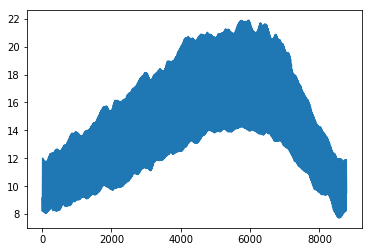

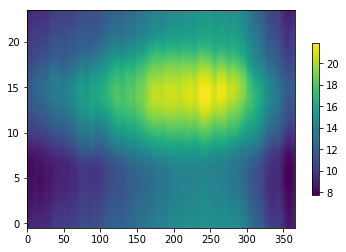

In [238]:
plt.plot(baseline.theta)

fig = plt.figure()
cax = plt.imshow(baseline.theta.reshape((366,24)).T, aspect='auto',origin='lower',interpolation='gaussian')
axc = fig.colorbar(cax, ax=fig.gca(), shrink=.7)

In [239]:
np.log10(baseline.best_lambda)

array([-4.44827586, -3.05172414])

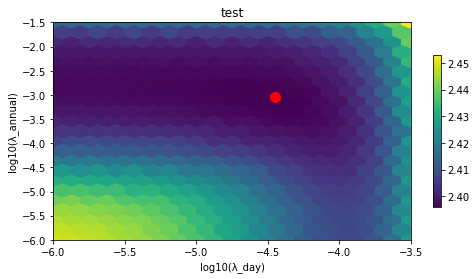

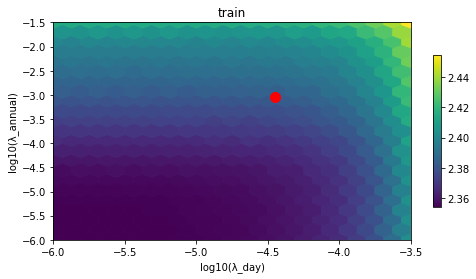

In [240]:
def plot_RMSE(baseline, cost_dict, title):
    fig = plt.figure(figsize=(8,4))
    cax = plt.hexbin(*np.array([[*np.log10(k), np.sqrt(v)] for k, v 
                          in cost_dict.items()]).T,
              gridsize=20)
    axc = fig.colorbar(cax, ax=fig.gca(), shrink=.7)
    plt.plot(*np.log10(baseline.best_lambda), 'ro', markersize=10)
    plt.xlabel('log10(λ_day)')
    plt.ylabel('log10(λ_annual)')
    plt.title(title)
    
plot_RMSE(baseline, baseline.val_costs, 'test')
plot_RMSE(baseline, baseline.tr_costs, 'train')

In [244]:
train.mean()

13.790117352994352

## Error

In [200]:
# residuals = np.abs(train - baseline.predict(train.index))

# res_baseline = npts.Baseline(npts.HourOfDay(lambdas=[baseline.best_lambda[0]]),#np.logspace(-6,-1, 20)), 
#                              npts.DayOfYear(lambdas=[baseline.best_lambda[1]]))#np.logspace(-7,-1, 20)))

# res_baseline.fit(residuals)#, initial_lambda = baseline.best_lambda)

In [201]:
# residuals = train - baseline.predict(train.index)
# abs_sigmas = (res_baseline.predict(train.index))

# (residuals/abs_sigmas).kurtosis()

In [202]:
# #res_baseline.theta = np.sqrt(res_baseline.theta)

# plt.plot((res_baseline.theta))

# fig = plt.figure()
# cax = plt.imshow((res_baseline.theta.reshape((366,24))).T, aspect='auto',origin='lower')
# axc = fig.colorbar(cax, ax=fig.gca(), shrink=.7)

## Error squared 

In [247]:
residuals_squared = (train - baseline.predict(train.index))**2
res_sq_baseline = npts.Baseline(npts.HourOfDay(lambdas=np.logspace(-6,-1, 30)), 
                             npts.MonthOfYear(lambdas=np.logspace(-7,-2, 30)))
res_sq_baseline.fit(residuals_squared)

Building baseline with 288 =  24*12 values.
building reg matrices
Fitting on 254446 observations, of dimension 1
Train set: 203478 obs. Test set : 50968 obs.
Making quadratic loss term for 203478 obs.
Making quadratic loss term for 50968 obs.
Provided lambdas: [array([1.00000000e-06, 1.48735211e-06, 2.21221629e-06, 3.29034456e-06,
       4.89390092e-06, 7.27895384e-06, 1.08263673e-05, 1.61026203e-05,
       2.39502662e-05, 3.56224789e-05, 5.29831691e-05, 7.88046282e-05,
       1.17210230e-04, 1.74332882e-04, 2.59294380e-04, 3.85662042e-04,
       5.73615251e-04, 8.53167852e-04, 1.26896100e-03, 1.88739182e-03,
       2.80721620e-03, 4.17531894e-03, 6.21016942e-03, 9.23670857e-03,
       1.37382380e-02, 2.04335972e-02, 3.03919538e-02, 4.52035366e-02,
       6.72335754e-02, 1.00000000e-01]), array([1.00000000e-07, 1.48735211e-07, 2.21221629e-07, 3.29034456e-07,
       4.89390092e-07, 7.27895384e-07, 1.08263673e-06, 1.61026203e-06,
       2.39502662e-06, 3.56224789e-06, 5.29831691e-06, 7.8

(203478, 1)
Tr. cost: 1.533e+02, val. cost: 1.573e+02
working with lambda (1.487352107293512e-06, 0.00012689610031679235)
solving with λ=(1.487352107293512e-06, 0.00012689610031679235)
CG took 0.0002968311309814453 seconds.
(50968, 1)
(203478, 1)
Tr. cost: 1.533e+02, val. cost: 1.573e+02
working with lambda (1.487352107293512e-06, 0.00018873918221350977)
solving with λ=(1.487352107293512e-06, 0.00018873918221350977)
CG took 0.0003719329833984375 seconds.
(50968, 1)
(203478, 1)
Tr. cost: 1.533e+02, val. cost: 1.573e+02
working with lambda (1.487352107293512e-06, 0.00028072162039411786)
solving with λ=(1.487352107293512e-06, 0.00028072162039411786)
CG took 0.0003669261932373047 seconds.
(50968, 1)
(203478, 1)
Tr. cost: 1.533e+02, val. cost: 1.573e+02
working with lambda (1.487352107293512e-06, 0.00041753189365604046)
solving with λ=(1.487352107293512e-06, 0.00041753189365604046)
CG took 0.00031375885009765625 seconds.
(50968, 1)
(203478, 1)
Tr. cost: 1.533e+02, val. cost: 1.572e+02
worki

CG took 0.00025177001953125 seconds.
(50968, 1)
(203478, 1)
Tr. cost: 1.533e+02, val. cost: 1.573e+02
working with lambda (3.290344562312671e-06, 2.2122162910704503e-07)
solving with λ=(3.290344562312671e-06, 2.2122162910704503e-07)
CG took 0.00022292137145996094 seconds.
(50968, 1)
(203478, 1)
Tr. cost: 1.533e+02, val. cost: 1.573e+02
working with lambda (3.290344562312671e-06, 3.290344562312671e-07)
solving with λ=(3.290344562312671e-06, 3.290344562312671e-07)
CG took 0.0002281665802001953 seconds.
(50968, 1)
(203478, 1)
Tr. cost: 1.533e+02, val. cost: 1.573e+02
working with lambda (3.290344562312671e-06, 4.893900918477499e-07)
solving with λ=(3.290344562312671e-06, 4.893900918477499e-07)
CG took 0.00024509429931640625 seconds.
(50968, 1)
(203478, 1)
Tr. cost: 1.533e+02, val. cost: 1.573e+02
working with lambda (3.290344562312671e-06, 7.278953843983146e-07)
solving with λ=(3.290344562312671e-06, 7.278953843983146e-07)
CG took 0.0002849102020263672 seconds.
(50968, 1)
(203478, 1)
Tr. 

CG took 0.0003681182861328125 seconds.
(50968, 1)
(203478, 1)
Tr. cost: 1.533e+02, val. cost: 1.573e+02
working with lambda (4.893900918477499e-06, 1.1721022975334793e-05)
solving with λ=(4.893900918477499e-06, 1.1721022975334793e-05)
CG took 0.0003399848937988281 seconds.
(50968, 1)
(203478, 1)
Tr. cost: 1.533e+02, val. cost: 1.573e+02
working with lambda (4.893900918477499e-06, 1.7433288221999873e-05)
solving with λ=(4.893900918477499e-06, 1.7433288221999873e-05)
CG took 0.0005369186401367188 seconds.
(50968, 1)
(203478, 1)
Tr. cost: 1.533e+02, val. cost: 1.573e+02
working with lambda (4.893900918477499e-06, 2.592943797404667e-05)
solving with λ=(4.893900918477499e-06, 2.592943797404667e-05)
CG took 0.0003478527069091797 seconds.
(50968, 1)
(203478, 1)
Tr. cost: 1.533e+02, val. cost: 1.573e+02
working with lambda (4.893900918477499e-06, 3.856620421163472e-05)
solving with λ=(4.893900918477499e-06, 3.856620421163472e-05)
CG took 0.0004649162292480469 seconds.
(50968, 1)
(203478, 1)
Tr

CG took 0.0005621910095214844 seconds.
(50968, 1)
(203478, 1)
Tr. cost: 1.533e+02, val. cost: 1.573e+02
working with lambda (7.2789538439831465e-06, 0.00018873918221350977)
solving with λ=(7.2789538439831465e-06, 0.00018873918221350977)
CG took 0.00039005279541015625 seconds.
(50968, 1)
(203478, 1)
Tr. cost: 1.533e+02, val. cost: 1.573e+02
working with lambda (7.2789538439831465e-06, 0.00028072162039411786)
solving with λ=(7.2789538439831465e-06, 0.00028072162039411786)
CG took 0.0005471706390380859 seconds.
(50968, 1)
(203478, 1)
Tr. cost: 1.533e+02, val. cost: 1.573e+02
working with lambda (7.2789538439831465e-06, 0.00041753189365604046)
solving with λ=(7.2789538439831465e-06, 0.00041753189365604046)
CG took 0.0003342628479003906 seconds.
(50968, 1)
(203478, 1)
Tr. cost: 1.533e+02, val. cost: 1.572e+02
working with lambda (7.2789538439831465e-06, 0.0006210169418915617)
solving with λ=(7.2789538439831465e-06, 0.0006210169418915617)
CG took 0.00046896934509277344 seconds.
(50968, 1)
(2

CG took 0.0002951622009277344 seconds.
(50968, 1)
(203478, 1)
Tr. cost: 1.533e+02, val. cost: 1.573e+02
working with lambda (1.610262027560939e-05, 7.880462815669904e-06)
solving with λ=(1.610262027560939e-05, 7.880462815669904e-06)
CG took 0.00044798851013183594 seconds.
(50968, 1)
(203478, 1)
Tr. cost: 1.533e+02, val. cost: 1.573e+02
working with lambda (1.610262027560939e-05, 1.1721022975334793e-05)
solving with λ=(1.610262027560939e-05, 1.1721022975334793e-05)
CG took 0.0003261566162109375 seconds.
(50968, 1)
(203478, 1)
Tr. cost: 1.533e+02, val. cost: 1.573e+02
working with lambda (1.610262027560939e-05, 1.7433288221999873e-05)
solving with λ=(1.610262027560939e-05, 1.7433288221999873e-05)
CG took 0.00044083595275878906 seconds.
(50968, 1)
(203478, 1)
Tr. cost: 1.533e+02, val. cost: 1.573e+02
working with lambda (1.610262027560939e-05, 2.592943797404667e-05)
solving with λ=(1.610262027560939e-05, 2.592943797404667e-05)
CG took 0.00042128562927246094 seconds.
(50968, 1)
(203478, 1)

CG took 0.0007371902465820312 seconds.
(50968, 1)
(203478, 1)
Tr. cost: 1.533e+02, val. cost: 1.573e+02
working with lambda (3.5622478902624444e-05, 1.4873521072935117e-07)
solving with λ=(3.5622478902624444e-05, 1.4873521072935117e-07)
CG took 0.000270843505859375 seconds.
(50968, 1)
(203478, 1)
Tr. cost: 1.533e+02, val. cost: 1.573e+02
working with lambda (3.5622478902624444e-05, 2.2122162910704503e-07)
solving with λ=(3.5622478902624444e-05, 2.2122162910704503e-07)
CG took 0.00028014183044433594 seconds.
(50968, 1)
(203478, 1)
Tr. cost: 1.533e+02, val. cost: 1.573e+02
working with lambda (3.5622478902624444e-05, 3.290344562312671e-07)
solving with λ=(3.5622478902624444e-05, 3.290344562312671e-07)
CG took 0.00022792816162109375 seconds.
(50968, 1)
(203478, 1)
Tr. cost: 1.533e+02, val. cost: 1.573e+02
working with lambda (3.5622478902624444e-05, 4.893900918477499e-07)
solving with λ=(3.5622478902624444e-05, 4.893900918477499e-07)
CG took 0.00024390220642089844 seconds.
(50968, 1)
(203

(203478, 1)
Tr. cost: 1.533e+02, val. cost: 1.573e+02
working with lambda (5.2983169062837125e-05, 5.298316906283713e-06)
solving with λ=(5.2983169062837125e-05, 5.298316906283713e-06)
CG took 0.0002810955047607422 seconds.
(50968, 1)
(203478, 1)
Tr. cost: 1.533e+02, val. cost: 1.573e+02
working with lambda (5.2983169062837125e-05, 7.880462815669904e-06)
solving with λ=(5.2983169062837125e-05, 7.880462815669904e-06)
CG took 0.00030422210693359375 seconds.
(50968, 1)
(203478, 1)
Tr. cost: 1.533e+02, val. cost: 1.573e+02
working with lambda (5.2983169062837125e-05, 1.1721022975334793e-05)
solving with λ=(5.2983169062837125e-05, 1.1721022975334793e-05)
CG took 0.00032901763916015625 seconds.
(50968, 1)
(203478, 1)
Tr. cost: 1.533e+02, val. cost: 1.573e+02
working with lambda (5.2983169062837125e-05, 1.7433288221999873e-05)
solving with λ=(5.2983169062837125e-05, 1.7433288221999873e-05)
CG took 0.0004417896270751953 seconds.
(50968, 1)
(203478, 1)
Tr. cost: 1.533e+02, val. cost: 1.573e+02


(203478, 1)
Tr. cost: 1.533e+02, val. cost: 1.573e+02
working with lambda (0.00011721022975334806, 2.2122162910704503e-07)
solving with λ=(0.00011721022975334806, 2.2122162910704503e-07)
CG took 0.0002598762512207031 seconds.
(50968, 1)
(203478, 1)
Tr. cost: 1.533e+02, val. cost: 1.573e+02
working with lambda (0.00011721022975334806, 3.290344562312671e-07)
solving with λ=(0.00011721022975334806, 3.290344562312671e-07)
CG took 0.0003829002380371094 seconds.
(50968, 1)
(203478, 1)
Tr. cost: 1.533e+02, val. cost: 1.573e+02
working with lambda (0.00011721022975334806, 4.893900918477499e-07)
solving with λ=(0.00011721022975334806, 4.893900918477499e-07)
CG took 0.00022101402282714844 seconds.
(50968, 1)
(203478, 1)
Tr. cost: 1.533e+02, val. cost: 1.573e+02
working with lambda (0.00011721022975334806, 7.278953843983146e-07)
solving with λ=(0.00011721022975334806, 7.278953843983146e-07)
CG took 0.0002319812774658203 seconds.
(50968, 1)
(203478, 1)
Tr. cost: 1.533e+02, val. cost: 1.573e+02
wor

(203478, 1)
Tr. cost: 1.533e+02, val. cost: 1.573e+02
working with lambda (0.0001743328822199989, 7.880462815669904e-06)
solving with λ=(0.0001743328822199989, 7.880462815669904e-06)
CG took 0.00036215782165527344 seconds.
(50968, 1)
(203478, 1)
Tr. cost: 1.533e+02, val. cost: 1.573e+02
working with lambda (0.0001743328822199989, 1.1721022975334793e-05)
solving with λ=(0.0001743328822199989, 1.1721022975334793e-05)
CG took 0.00026988983154296875 seconds.
(50968, 1)
(203478, 1)
Tr. cost: 1.533e+02, val. cost: 1.573e+02
working with lambda (0.0001743328822199989, 1.7433288221999873e-05)
solving with λ=(0.0001743328822199989, 1.7433288221999873e-05)
CG took 0.00032806396484375 seconds.
(50968, 1)
(203478, 1)
Tr. cost: 1.533e+02, val. cost: 1.573e+02
working with lambda (0.0001743328822199989, 2.592943797404667e-05)
solving with λ=(0.0001743328822199989, 2.592943797404667e-05)
CG took 0.0004899501800537109 seconds.
(50968, 1)
(203478, 1)
Tr. cost: 1.533e+02, val. cost: 1.573e+02
working wi

CG took 0.0003299713134765625 seconds.
(50968, 1)
(203478, 1)
Tr. cost: 1.533e+02, val. cost: 1.572e+02
working with lambda (0.0002592943797404667, 0.00028072162039411786)
solving with λ=(0.0002592943797404667, 0.00028072162039411786)
CG took 0.000446319580078125 seconds.
(50968, 1)
(203478, 1)
Tr. cost: 1.533e+02, val. cost: 1.572e+02
working with lambda (0.0002592943797404667, 0.00041753189365604046)
solving with λ=(0.0002592943797404667, 0.00041753189365604046)
CG took 0.00034928321838378906 seconds.
(50968, 1)
(203478, 1)
Tr. cost: 1.534e+02, val. cost: 1.572e+02
working with lambda (0.0002592943797404667, 0.0006210169418915617)
solving with λ=(0.0002592943797404667, 0.0006210169418915617)
CG took 0.0004978179931640625 seconds.
(50968, 1)
(203478, 1)
Tr. cost: 1.534e+02, val. cost: 1.572e+02
working with lambda (0.0002592943797404667, 0.0009236708571873865)
solving with λ=(0.0002592943797404667, 0.0009236708571873865)
CG took 0.0006458759307861328 seconds.
(50968, 1)
(203478, 1)
Tr

CG took 0.00019598007202148438 seconds.
(50968, 1)
(203478, 1)
Tr. cost: 1.533e+02, val. cost: 1.572e+02
working with lambda (0.0005736152510448681, 7.278953843983146e-07)
solving with λ=(0.0005736152510448681, 7.278953843983146e-07)
CG took 0.00019478797912597656 seconds.
(50968, 1)
(203478, 1)
Tr. cost: 1.533e+02, val. cost: 1.572e+02
working with lambda (0.0005736152510448681, 1.0826367338740541e-06)
solving with λ=(0.0005736152510448681, 1.0826367338740541e-06)
CG took 0.00019502639770507812 seconds.
(50968, 1)
(203478, 1)
Tr. cost: 1.533e+02, val. cost: 1.572e+02
working with lambda (0.0005736152510448681, 1.6102620275609392e-06)
solving with λ=(0.0005736152510448681, 1.6102620275609392e-06)
CG took 0.00023674964904785156 seconds.
(50968, 1)
(203478, 1)
Tr. cost: 1.533e+02, val. cost: 1.572e+02
working with lambda (0.0005736152510448681, 2.395026619987486e-06)
solving with λ=(0.0005736152510448681, 2.395026619987486e-06)
CG took 0.00023412704467773438 seconds.
(50968, 1)
(203478, 

CG took 0.0003368854522705078 seconds.
(50968, 1)
(203478, 1)
Tr. cost: 1.533e+02, val. cost: 1.572e+02
working with lambda (0.0008531678524172815, 0.00018873918221350977)
solving with λ=(0.0008531678524172815, 0.00018873918221350977)
CG took 0.0005197525024414062 seconds.
(50968, 1)
(203478, 1)
Tr. cost: 1.533e+02, val. cost: 1.572e+02
working with lambda (0.0008531678524172815, 0.00028072162039411786)
solving with λ=(0.0008531678524172815, 0.00028072162039411786)
CG took 0.00036525726318359375 seconds.
(50968, 1)
(203478, 1)
Tr. cost: 1.533e+02, val. cost: 1.572e+02
working with lambda (0.0008531678524172815, 0.00041753189365604046)
solving with λ=(0.0008531678524172815, 0.00041753189365604046)
CG took 0.0003628730773925781 seconds.
(50968, 1)
(203478, 1)
Tr. cost: 1.534e+02, val. cost: 1.572e+02
working with lambda (0.0008531678524172815, 0.0006210169418915617)
solving with λ=(0.0008531678524172815, 0.0006210169418915617)
CG took 0.00039386749267578125 seconds.
(50968, 1)
(203478, 1

CG took 0.0005719661712646484 seconds.
(50968, 1)
(203478, 1)
Tr. cost: 1.548e+02, val. cost: 1.583e+02
working with lambda (0.0018873918221350976, 1e-07)
solving with λ=(0.0018873918221350976, 1e-07)
CG took 0.0005121231079101562 seconds.
(50968, 1)
(203478, 1)
Tr. cost: 1.533e+02, val. cost: 1.572e+02
working with lambda (0.0018873918221350976, 1.4873521072935117e-07)
solving with λ=(0.0018873918221350976, 1.4873521072935117e-07)
CG took 0.00018310546875 seconds.
(50968, 1)
(203478, 1)
Tr. cost: 1.533e+02, val. cost: 1.572e+02
working with lambda (0.0018873918221350976, 2.2122162910704503e-07)
solving with λ=(0.0018873918221350976, 2.2122162910704503e-07)
CG took 0.00015401840209960938 seconds.
(50968, 1)
(203478, 1)
Tr. cost: 1.533e+02, val. cost: 1.572e+02
working with lambda (0.0018873918221350976, 3.290344562312671e-07)
solving with λ=(0.0018873918221350976, 3.290344562312671e-07)
CG took 0.00022983551025390625 seconds.
(50968, 1)
(203478, 1)
Tr. cost: 1.533e+02, val. cost: 1.572

(203478, 1)
Tr. cost: 1.534e+02, val. cost: 1.572e+02
working with lambda (0.0028072162039411786, 5.298316906283713e-06)
solving with λ=(0.0028072162039411786, 5.298316906283713e-06)
CG took 0.0005068778991699219 seconds.
(50968, 1)
(203478, 1)
Tr. cost: 1.534e+02, val. cost: 1.572e+02
working with lambda (0.0028072162039411786, 7.880462815669904e-06)
solving with λ=(0.0028072162039411786, 7.880462815669904e-06)
CG took 0.0003941059112548828 seconds.
(50968, 1)
(203478, 1)
Tr. cost: 1.534e+02, val. cost: 1.572e+02
working with lambda (0.0028072162039411786, 1.1721022975334793e-05)
solving with λ=(0.0028072162039411786, 1.1721022975334793e-05)
CG took 0.00033211708068847656 seconds.
(50968, 1)
(203478, 1)
Tr. cost: 1.534e+02, val. cost: 1.572e+02
working with lambda (0.0028072162039411786, 1.7433288221999873e-05)
solving with λ=(0.0028072162039411786, 1.7433288221999873e-05)
CG took 0.000331878662109375 seconds.
(50968, 1)
(203478, 1)
Tr. cost: 1.534e+02, val. cost: 1.572e+02
working wi

CG took 0.0005319118499755859 seconds.
(50968, 1)
(203478, 1)
Tr. cost: 1.543e+02, val. cost: 1.579e+02
working with lambda (0.004175318936560405, 0.006723357536499335)
solving with λ=(0.004175318936560405, 0.006723357536499335)
CG took 0.0010776519775390625 seconds.
(50968, 1)
(203478, 1)
Tr. cost: 1.546e+02, val. cost: 1.581e+02
working with lambda (0.004175318936560405, 0.01)
solving with λ=(0.004175318936560405, 0.01)
CG took 0.0006000995635986328 seconds.
(50968, 1)
(203478, 1)
Tr. cost: 1.549e+02, val. cost: 1.584e+02
working with lambda (0.006210169418915616, 1e-07)
solving with λ=(0.006210169418915616, 1e-07)
CG took 0.0006117820739746094 seconds.
(50968, 1)
(203478, 1)
Tr. cost: 1.536e+02, val. cost: 1.572e+02
working with lambda (0.006210169418915616, 1.4873521072935117e-07)
solving with λ=(0.006210169418915616, 1.4873521072935117e-07)
CG took 0.00022602081298828125 seconds.
(50968, 1)
(203478, 1)
Tr. cost: 1.536e+02, val. cost: 1.572e+02
working with lambda (0.00621016941891

(203478, 1)
Tr. cost: 1.537e+02, val. cost: 1.574e+02
working with lambda (0.009236708571873866, 5.736152510448681e-05)
solving with λ=(0.009236708571873866, 5.736152510448681e-05)
CG took 0.00040411949157714844 seconds.
(50968, 1)
(203478, 1)
Tr. cost: 1.537e+02, val. cost: 1.574e+02
working with lambda (0.009236708571873866, 8.531678524172815e-05)
solving with λ=(0.009236708571873866, 8.531678524172815e-05)
CG took 0.0004239082336425781 seconds.
(50968, 1)
(203478, 1)
Tr. cost: 1.537e+02, val. cost: 1.574e+02
working with lambda (0.009236708571873866, 0.00012689610031679235)
solving with λ=(0.009236708571873866, 0.00012689610031679235)
CG took 0.00043201446533203125 seconds.
(50968, 1)
(203478, 1)
Tr. cost: 1.537e+02, val. cost: 1.574e+02
working with lambda (0.009236708571873866, 0.00018873918221350977)
solving with λ=(0.009236708571873866, 0.00018873918221350977)
CG took 0.0004520416259765625 seconds.
(50968, 1)
(203478, 1)
Tr. cost: 1.537e+02, val. cost: 1.574e+02
working with lam

CG took 0.0003120899200439453 seconds.
(50968, 1)
(203478, 1)
Tr. cost: 1.542e+02, val. cost: 1.578e+02
working with lambda (0.02043359717856944, 2.2122162910704503e-07)
solving with λ=(0.02043359717856944, 2.2122162910704503e-07)
CG took 0.0001952648162841797 seconds.
(50968, 1)
(203478, 1)
Tr. cost: 1.542e+02, val. cost: 1.578e+02
working with lambda (0.02043359717856944, 3.290344562312671e-07)
solving with λ=(0.02043359717856944, 3.290344562312671e-07)
CG took 0.0002739429473876953 seconds.
(50968, 1)
(203478, 1)
Tr. cost: 1.542e+02, val. cost: 1.578e+02
working with lambda (0.02043359717856944, 4.893900918477499e-07)
solving with λ=(0.02043359717856944, 4.893900918477499e-07)
CG took 0.00033473968505859375 seconds.
(50968, 1)
(203478, 1)
Tr. cost: 1.542e+02, val. cost: 1.578e+02
working with lambda (0.02043359717856944, 7.278953843983146e-07)
solving with λ=(0.02043359717856944, 7.278953843983146e-07)
CG took 0.000179290771484375 seconds.
(50968, 1)
(203478, 1)
Tr. cost: 1.542e+02,

(203478, 1)
Tr. cost: 1.547e+02, val. cost: 1.582e+02
working with lambda (0.03039195382313201, 1.7433288221999873e-05)
solving with λ=(0.03039195382313201, 1.7433288221999873e-05)
CG took 0.0005247592926025391 seconds.
(50968, 1)
(203478, 1)
Tr. cost: 1.547e+02, val. cost: 1.582e+02
working with lambda (0.03039195382313201, 2.592943797404667e-05)
solving with λ=(0.03039195382313201, 2.592943797404667e-05)
CG took 0.0011548995971679688 seconds.
(50968, 1)
(203478, 1)
Tr. cost: 1.547e+02, val. cost: 1.582e+02
working with lambda (0.03039195382313201, 3.856620421163472e-05)
solving with λ=(0.03039195382313201, 3.856620421163472e-05)
CG took 0.0011508464813232422 seconds.
(50968, 1)
(203478, 1)
Tr. cost: 1.547e+02, val. cost: 1.582e+02
working with lambda (0.03039195382313201, 5.736152510448681e-05)
solving with λ=(0.03039195382313201, 5.736152510448681e-05)
CG took 0.0007851123809814453 seconds.
(50968, 1)
(203478, 1)
Tr. cost: 1.547e+02, val. cost: 1.582e+02
working with lambda (0.03039

CG took 0.0014536380767822266 seconds.
(50968, 1)
(203478, 1)
Tr. cost: 1.553e+02, val. cost: 1.588e+02
working with lambda (0.0452035365636025, 0.0006210169418915617)
solving with λ=(0.0452035365636025, 0.0006210169418915617)
CG took 0.001062154769897461 seconds.
(50968, 1)
(203478, 1)
Tr. cost: 1.553e+02, val. cost: 1.588e+02
working with lambda (0.0452035365636025, 0.0009236708571873865)
solving with λ=(0.0452035365636025, 0.0009236708571873865)
CG took 0.0010247230529785156 seconds.
(50968, 1)
(203478, 1)
Tr. cost: 1.554e+02, val. cost: 1.589e+02
working with lambda (0.0452035365636025, 0.0013738237958832637)
solving with λ=(0.0452035365636025, 0.0013738237958832637)
CG took 0.0010731220245361328 seconds.
(50968, 1)
(203478, 1)
Tr. cost: 1.555e+02, val. cost: 1.589e+02
working with lambda (0.0452035365636025, 0.002043359717856944)
solving with λ=(0.0452035365636025, 0.002043359717856944)
CG took 0.0012211799621582031 seconds.
(50968, 1)
(203478, 1)
Tr. cost: 1.556e+02, val. cost: 1

CG took 0.0011677742004394531 seconds.
(50968, 1)
(203478, 1)
Tr. cost: 1.569e+02, val. cost: 1.602e+02
working with lambda (0.1, 1e-07)
solving with λ=(0.1, 1e-07)
CG took 0.0012700557708740234 seconds.
(50968, 1)
(203478, 1)
Tr. cost: 1.565e+02, val. cost: 1.599e+02
working with lambda (0.1, 1.4873521072935117e-07)
solving with λ=(0.1, 1.4873521072935117e-07)
CG took 0.00018978118896484375 seconds.
(50968, 1)
(203478, 1)
Tr. cost: 1.565e+02, val. cost: 1.599e+02
working with lambda (0.1, 2.2122162910704503e-07)
solving with λ=(0.1, 2.2122162910704503e-07)
CG took 0.00015211105346679688 seconds.
(50968, 1)
(203478, 1)
Tr. cost: 1.565e+02, val. cost: 1.599e+02
working with lambda (0.1, 3.290344562312671e-07)
solving with λ=(0.1, 3.290344562312671e-07)
CG took 0.0001590251922607422 seconds.
(50968, 1)
(203478, 1)
Tr. cost: 1.565e+02, val. cost: 1.599e+02
working with lambda (0.1, 4.893900918477499e-07)
solving with λ=(0.1, 4.893900918477499e-07)
CG took 0.0005660057067871094 seconds.
(5

In [248]:
np.log10(res_sq_baseline.best_lambda)

array([-2.72413793, -3.89655172])

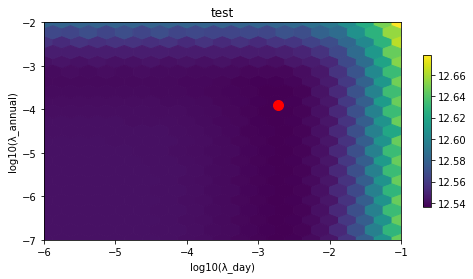

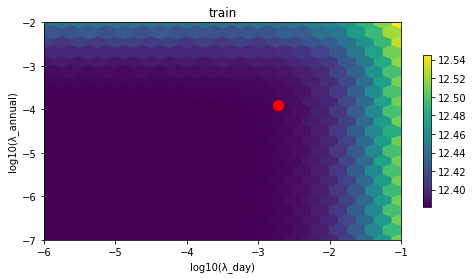

In [249]:
plot_RMSE(res_sq_baseline, res_sq_baseline.val_costs, 'test')
plot_RMSE(res_sq_baseline, res_sq_baseline.tr_costs, 'train')

In [152]:
# import pandas as pd
# import pdvega  # adds vgplot attribute to Pandas objects

# data = pd.Series([1,2,3,2,3,4,3,4,5])
# data.vgplot()

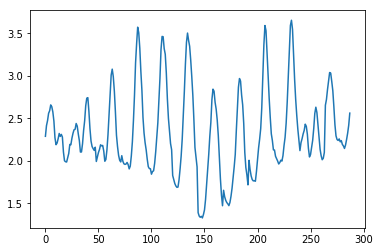

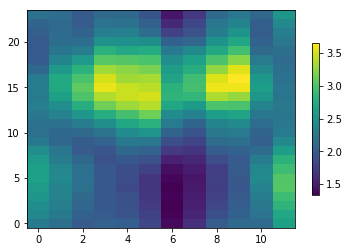

In [251]:
#res_baseline.theta = np.sqrt(res_baseline.theta)

plt.plot(np.sqrt(res_sq_baseline.theta))

fig = plt.figure()
cax = plt.imshow(np.sqrt(res_sq_baseline.theta.reshape((12,24))).T, aspect='auto',origin='lower')
axc = fig.colorbar(cax, ax=fig.gca(), shrink=.7)

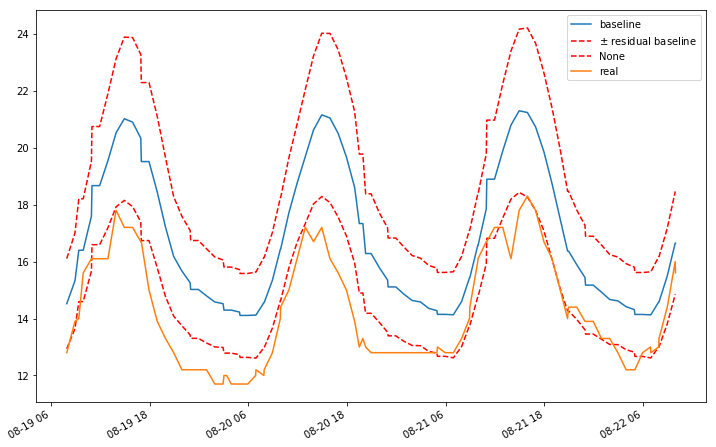

In [252]:
win_s, win_e = 2000, 2098

data_used = test[win_s:win_e]

plt.figure(figsize=(12,8))
baseline.predict(data_used.index).plot(label='baseline')
(baseline.predict(data_used.index) + np.sqrt(res_sq_baseline.predict(data_used.index))).plot(label='$\pm$ residual baseline',
                                                                                 style='r--')
(baseline.predict(data_used.index) - np.sqrt(res_sq_baseline.predict(data_used.index))).plot(style='r--')
data_used.plot(label='real')
plt.legend()

In [208]:
residuals = test - baseline.predict(test.index)
sigmas = np.sqrt(res_sq_baseline.predict(test.index))

normalized = (residuals/sigmas)

normalized.kurtosis()

0.9750917252209272

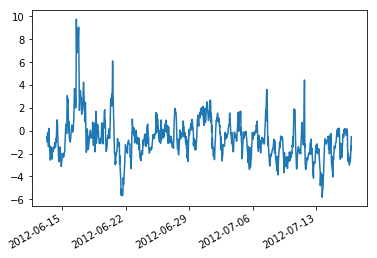

In [209]:
residuals[:1000].plot()

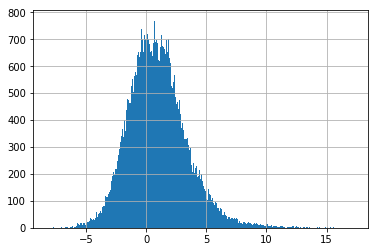

In [210]:
residuals.hist(bins=400)

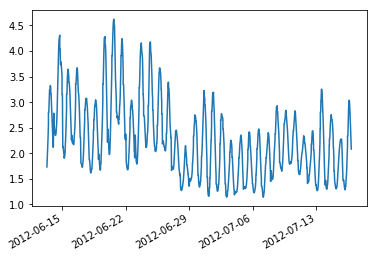

In [211]:
sigmas[:1000].plot()

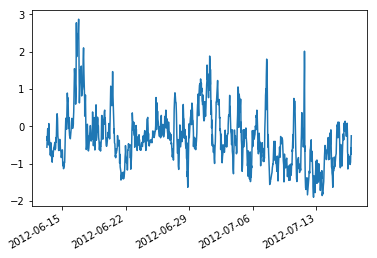

In [212]:
normalized[:1000].plot()

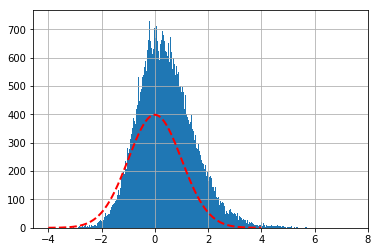

In [217]:
import matplotlib.mlab as mlab

xs = np.arange(-4,4,.01)

bins=normalized.hist(bins=400)

l = plt.plot(xs, mlab.normpdf( xs, 0, 1)*1000, 'r--', linewidth=2)

In [142]:
residuals.kurtosis()

2.560819527897812

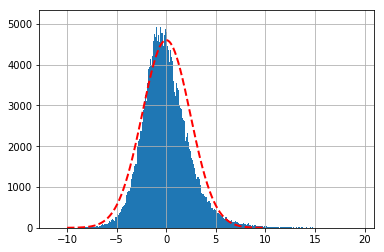

In [140]:
xs = np.arange(-10,10,.01)

bins=residuals.hist(bins=400)

l = plt.plot(xs, mlab.normpdf( xs, residuals.mean(), residuals.std())*28000, 'r--', linewidth=2)

In [116]:
2*np.sqrt(len(normalized))

1127.9326221011609

In [97]:
normalized.mean(), normalized.std()

(-0.005512483911544746, 0.9927853856325263)

In [17]:
# data.temp[data.qual_code.isin([1,5])].plot()

In [23]:
# baseline = npts.NonParametricModel(npts.HourOfDay(), npts.DayOfYear())
# baseline.fit(data['HLY-TEMP-NORMAL'])

In [24]:
# plt.imshow(baseline.theta.reshape((366,24)).T, aspect='auto', 
#            origin='lower', interpolation='gaussian',)

In [25]:
# plt.plot(baseline.theta)

## Split into train - test 

In [6]:
mask = np.random.uniform(size=len(covariance)) < .9
train = covariance[mask] #data.iloc[:-366]
test = covariance[~mask] #data.iloc[-366:]

### Plotting functions

In [6]:
def plot_RMSE(cost_dict, title):
    fig = plt.figure(figsize=(8,4))
    cax = plt.hexbin(*np.array([[*np.log(k), np.sqrt(v)] for k, v 
                          in cost_dict.items()]).T,
              gridsize=10)
    axc = fig.colorbar(cax, ax=fig.gca(), shrink=.7)
    plt.plot(*np.log(baseline.best_lambda), 'ro', markersize=10)
    plt.xlabel('log(λ_week)')
    plt.ylabel('log(λ_quart)')
    plt.title(title)
    
def plot_baseline(baseline):
    fig = plt.figure(figsize=(8,4))
    avg = np.mean(baseline.theta)
    cax = plt.imshow((baseline.theta - avg).reshape(262,5).T, 
                     origin='lower', aspect='auto')
    axc = fig.colorbar(cax, ax=fig.gca(), shrink=.7)
    plt.title(f'De-meaned baseline; mean = {avg:.3f}')
    plt.xlabel('Day of quarter')
    plt.ylabel('Day of week')
    
    
def plot_seasonal(seasonal):
    plt.figure()
    avg = seasonal.theta.mean()
    plt.plot(seasonal.theta - avg)
    plt.title(f'De-meaned seasonal; mean = {avg:.3f}')
    plt.xlabel('Day of period')

### Analysis functions 

In [7]:
def RMSE(data, predictor):
    return np.sqrt(((predictor(data.index) - data)**2).mean())

def fit_and_compare_all(train_series, test_series):

    baseline = npts.NonParametricModel(npts.DayOfWorkWeek(),#lambdas=[None,.1,.5,1.,5.,1E1,1E2,1E3]), 
                                        npts.BDayOfYear())#lambdas=[None,1E1,50, 1E2,500, 1E3,1E4]))
    baseline.fit(train_series, method='train-test')
    
    mean = np.mean(train_series)

    weekly_seasonal = npts.NonParametricModel(npts.DayOfWorkWeek(lambdas=[0.]))
    weekly_seasonal.fit(train_series, train_frac=1., method='train-test')

    quarterly_seasonal = npts.NonParametricModel(npts.BDayOfQuarter(lambdas=[0.]))
    quarterly_seasonal.fit(train_series, train_frac=1., method='train-test')
    
    df = pd.DataFrame(index=['train RMSE', 'test RMSE'], 
                      columns=['baseline', 'weekly_seas', 'quarterly_seas'])
    for i, data in enumerate((train_series, test_series)):
        for j, indexer in enumerate((baseline, weekly_seasonal, quarterly_seasonal)):
            df.iloc[i,j] = RMSE(data, indexer.predict)
            
    df.loc['train RMSE', 'mean'] = np.sqrt(((mean - train_series)**2).mean())
    df.loc['test RMSE', 'mean'] = np.sqrt(((mean - test_series)**2).mean())

    return baseline, mean, weekly_seasonal, quarterly_seasonal, df

# Analysis: RMSEs of all models

In [8]:
big_df = pd.DataFrame()

In [9]:
for colname in data.columns:
    train_series = train[colname]*1E4
    test_series = test[colname]*1E4

    baseline, mean, weekly_seasonal, quarterly_seasonal, df = \
        fit_and_compare_all(train_series, test_series)

    big_df = big_df.append(df.set_index([["$\\text{%s}$ ($b.p.$)"%colname]*2, df.index]))

    train_series = (train[colname]*1E4)**2
    test_series = (test[colname]*1E4)**2

    baseline, mean, weekly_seasonal, quarterly_seasonal, df = \
        fit_and_compare_all(train_series, test_series)

    big_df = big_df.append(df.set_index([['$\\text{%s}^2$ ($b.p.^2$)'%colname]*2, df.index]))

/Users/enzo/anaconda3/lib/python3.6/site-packages/scipy/sparse/base.py:541: RuntimeWarning: divide by zero encountered in double_scalars
  return self.astype(np.float_)._mul_scalar(1./other)


## Compare all RMSES 

Rows are highlighted. Each yellow cell is the model that achieves the lowest train RMSE. Blue, the one that achieves the lowest test RMSE. We see than, most often, the baseline has the best test RMSE.

In [10]:
def highlight_min_train_test(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_min = s == s.min()
    if s.name[1] == 'test RMSE':
        return ['background-color: cyan' if v else '' for v in is_min]
    else:
        return ['background-color: yellow' if v else '' for v in is_min]
    
big_df.style.apply(highlight_min_train_test, 1)

# Plot of selected models 

For a selection of models, we plot the RMSEs of the iterates (for the search in the space of regularizing λ), and
the resulting baseline models. We also plot the weekly and quarterly seasonal means.

/Users/enzo/anaconda3/lib/python3.6/site-packages/scipy/sparse/base.py:541: RuntimeWarning: divide by zero encountered in double_scalars
  return self.astype(np.float_)._mul_scalar(1./other)


,baseline,weekly_seas,quarterly_seas,mean
train RMSE,6.80217,6.82559,6.78333,6.831164
test RMSE,6.65378,6.71833,6.77543,6.719576


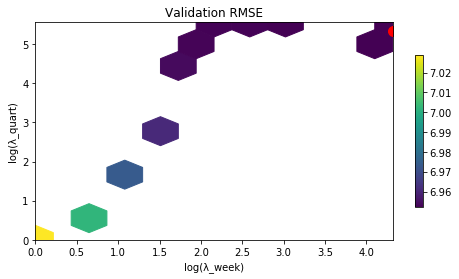

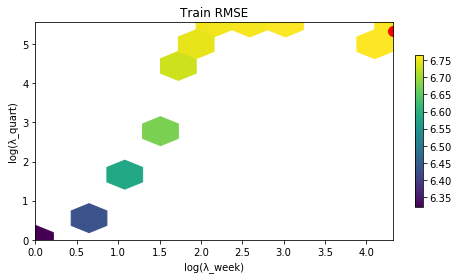

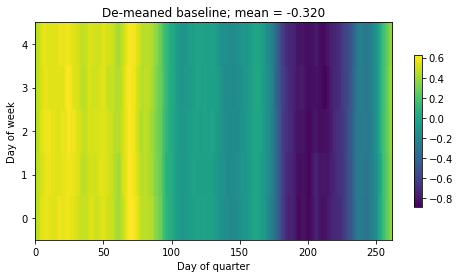

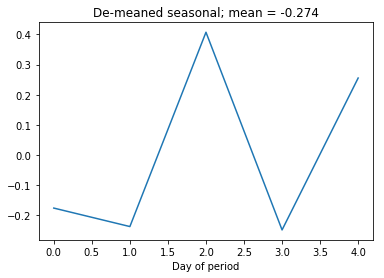

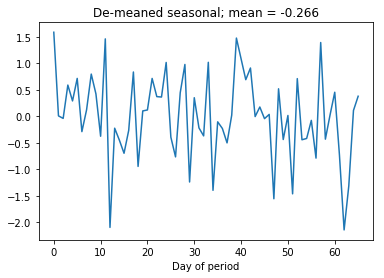

In [11]:
## LEVERAGE, non-square

train_series = train.LEVERAGE*1E4
test_series = test.LEVERAGE*1E4

baseline, mean, weekly_seasonal, quarterly_seasonal, df = \
    fit_and_compare_all(train_series, test_series)
    
## Plot and results
plot_RMSE(baseline.val_costs, 'Validation RMSE')
plot_RMSE(baseline.tr_costs, 'Train RMSE')
plot_baseline(baseline)

plot_seasonal(weekly_seasonal)
plot_seasonal(quarterly_seasonal)

df

/Users/enzo/anaconda3/lib/python3.6/site-packages/scipy/sparse/base.py:541: RuntimeWarning: divide by zero encountered in double_scalars
  return self.astype(np.float_)._mul_scalar(1./other)


,baseline,weekly_seas,quarterly_seas,mean
train RMSE,19.801,20.1467,19.9528,20.163512
test RMSE,20.5744,20.5674,20.6148,20.584366


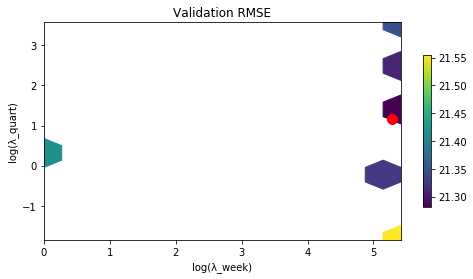

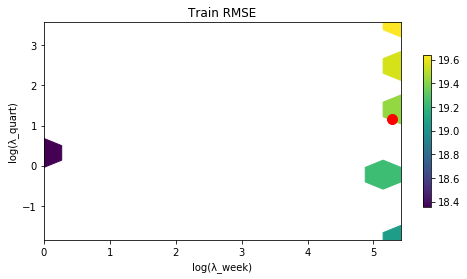

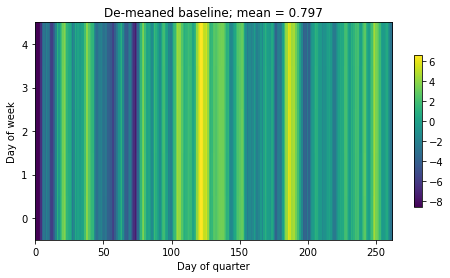

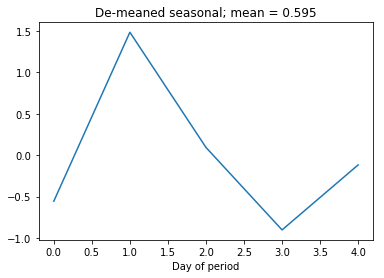

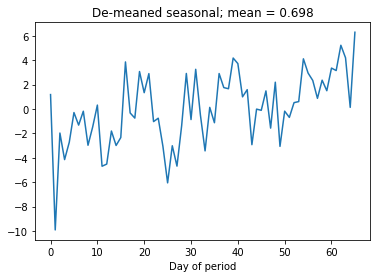

In [12]:
## MOMENTUM, non-square

train_series = train.MOMENTUM*1E4
test_series = test.MOMENTUM*1E4

baseline, mean, weekly_seasonal, quarterly_seasonal, df = \
    fit_and_compare_all(train_series, test_series)
    
## Plot and results
plot_RMSE(baseline.val_costs, 'Validation RMSE')
plot_RMSE(baseline.tr_costs, 'Train RMSE')
plot_baseline(baseline)

plot_seasonal(weekly_seasonal)
plot_seasonal(quarterly_seasonal)

df

/Users/enzo/anaconda3/lib/python3.6/site-packages/scipy/sparse/base.py:541: RuntimeWarning: divide by zero encountered in double_scalars
  return self.astype(np.float_)._mul_scalar(1./other)


,baseline,weekly_seas,quarterly_seas,mean
train RMSE,11.5918,11.6041,11.5054,11.610540
test RMSE,11.3925,11.4043,11.3672,11.386642


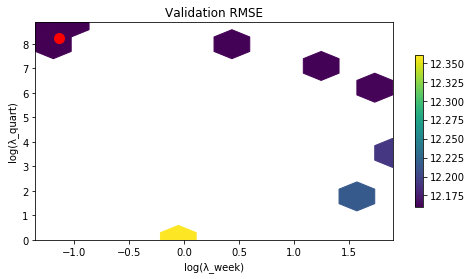

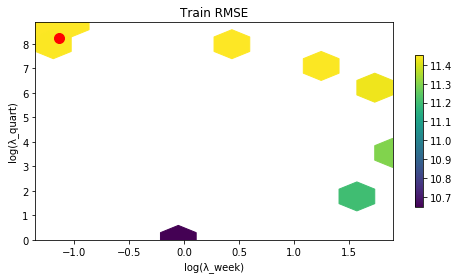

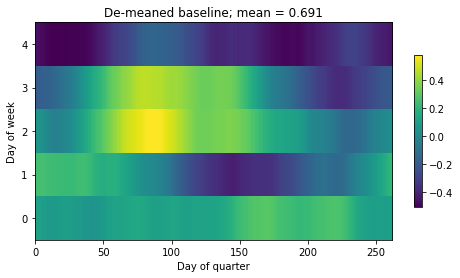

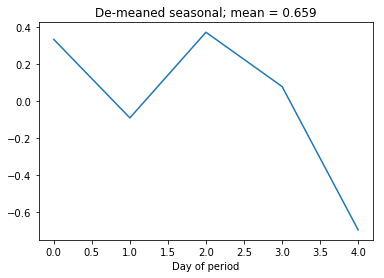

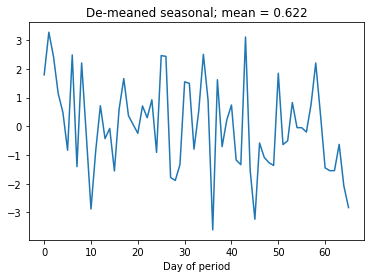

In [13]:
## VALUE, non-square

train_series = train.VALUE*1E4
test_series = test.VALUE*1E4

baseline, mean, weekly_seasonal, quarterly_seasonal, df = \
    fit_and_compare_all(train_series, test_series)
    
## Plot and results
plot_RMSE(baseline.val_costs, 'Validation RMSE')
plot_RMSE(baseline.tr_costs, 'Train RMSE')
plot_baseline(baseline)

plot_seasonal(weekly_seasonal)
plot_seasonal(quarterly_seasonal)

df

/Users/enzo/anaconda3/lib/python3.6/site-packages/scipy/sparse/base.py:541: RuntimeWarning: divide by zero encountered in double_scalars
  return self.astype(np.float_)._mul_scalar(1./other)


,baseline,weekly_seas,quarterly_seas,mean
train RMSE,7.65842,7.69483,7.64088,7.703600
test RMSE,7.37818,7.39039,7.40745,7.385444


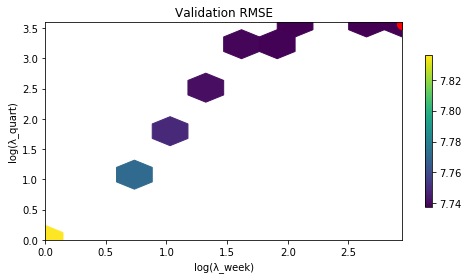

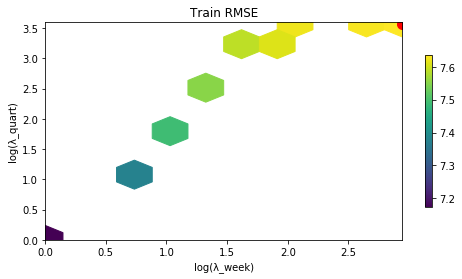

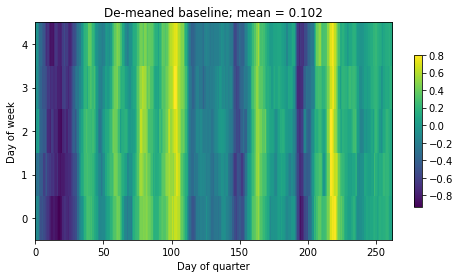

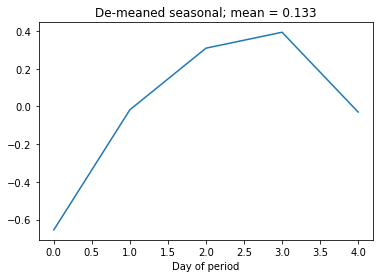

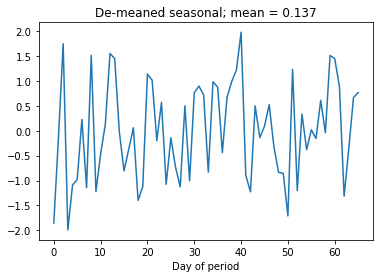

In [14]:
## GROWTH, non-square

train_series = train.GROWTH*1E4
test_series = test.GROWTH*1E4

baseline, mean, weekly_seasonal, quarterly_seasonal, df = \
    fit_and_compare_all(train_series, test_series)
    
## Plot and results
plot_RMSE(baseline.val_costs, 'Validation RMSE')
plot_RMSE(baseline.tr_costs, 'Train RMSE')
plot_baseline(baseline)

plot_seasonal(weekly_seasonal)
plot_seasonal(quarterly_seasonal)

df

/Users/enzo/anaconda3/lib/python3.6/site-packages/scipy/sparse/base.py:541: RuntimeWarning: divide by zero encountered in double_scalars
  return self.astype(np.float_)._mul_scalar(1./other)


,baseline,weekly_seas,quarterly_seas,mean
train RMSE,4.53782,4.53795,4.51271,4.540963
test RMSE,4.44248,4.43835,4.47384,4.439309


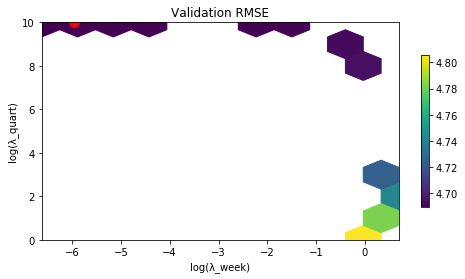

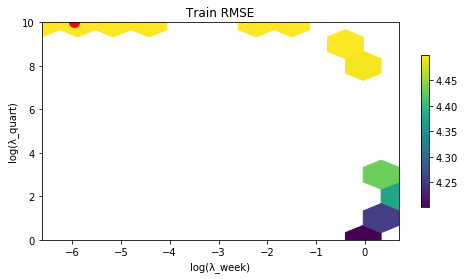

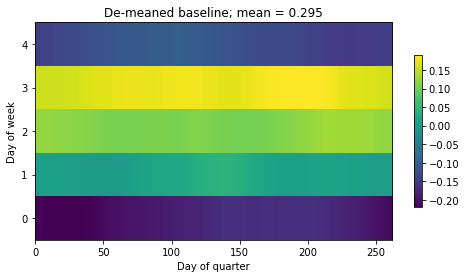

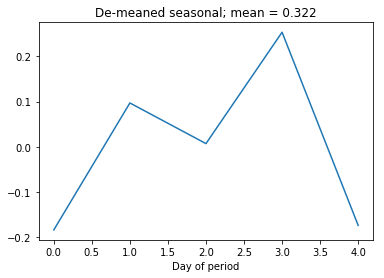

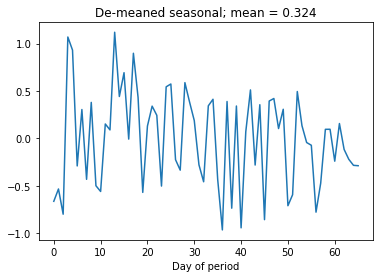

In [15]:
## FMOM2_SMOOTHED, non-square

train_series = train.FMOM2_SMOOTHED*1E4
test_series = test.FMOM2_SMOOTHED*1E4

baseline, mean, weekly_seasonal, quarterly_seasonal, df = \
    fit_and_compare_all(train_series, test_series)
    
## Plot and results
plot_RMSE(baseline.val_costs, 'Validation RMSE')
plot_RMSE(baseline.tr_costs, 'Train RMSE')
plot_baseline(baseline)

plot_seasonal(weekly_seasonal)
plot_seasonal(quarterly_seasonal)

df

/Users/enzo/anaconda3/lib/python3.6/site-packages/scipy/sparse/base.py:541: RuntimeWarning: divide by zero encountered in double_scalars
  return self.astype(np.float_)._mul_scalar(1./other)


,baseline,weekly_seas,quarterly_seas,mean
train RMSE,12.5813,12.6427,12.5068,12.693272
test RMSE,11.9684,11.9759,12.1023,11.957892


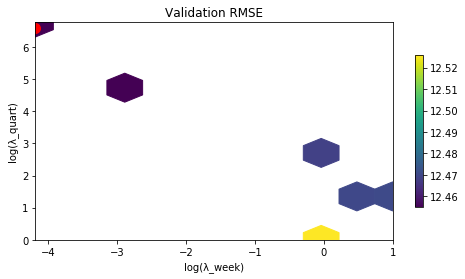

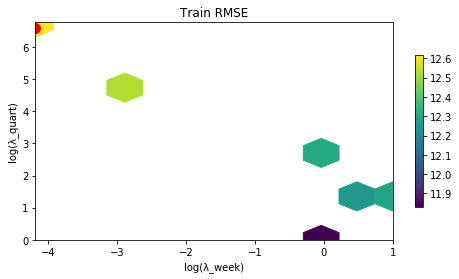

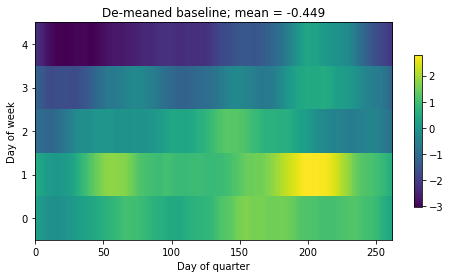

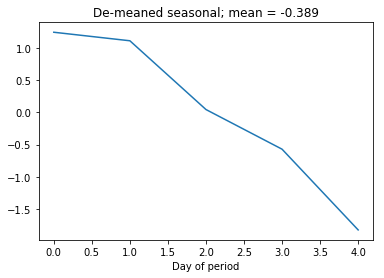

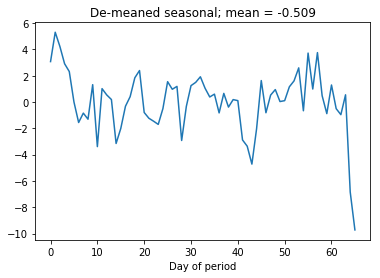

In [16]:
## SIZE, non-square

train_series = train.SIZE*1E4
test_series = test.SIZE*1E4

baseline, mean, weekly_seasonal, quarterly_seasonal, df = \
    fit_and_compare_all(train_series, test_series)
    
## Plot and results
plot_RMSE(baseline.val_costs, 'Validation RMSE')
plot_RMSE(baseline.tr_costs, 'Train RMSE')
plot_baseline(baseline)

plot_seasonal(weekly_seasonal)
plot_seasonal(quarterly_seasonal)

df

/Users/enzo/anaconda3/lib/python3.6/site-packages/scipy/sparse/base.py:541: RuntimeWarning: divide by zero encountered in double_scalars
  return self.astype(np.float_)._mul_scalar(1./other)


,baseline,weekly_seas,quarterly_seas,mean
train RMSE,38.7575,38.7585,38.4635,38.800358
test RMSE,36.8659,36.9111,37.3031,36.947519


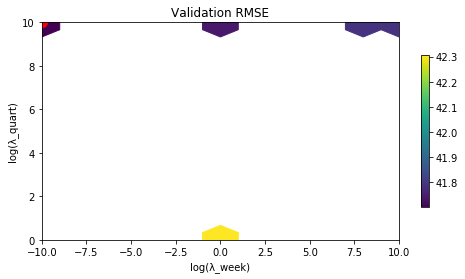

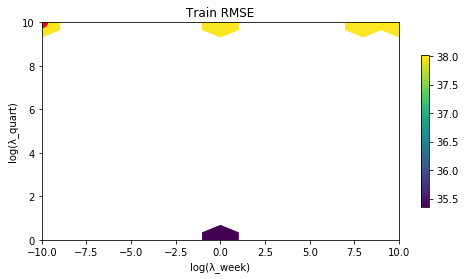

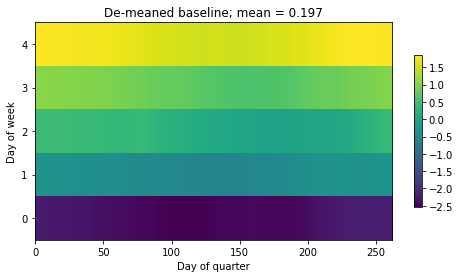

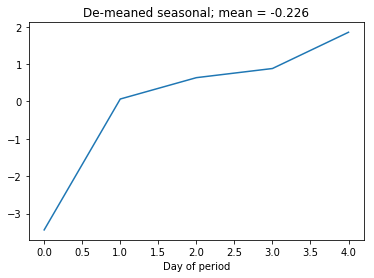

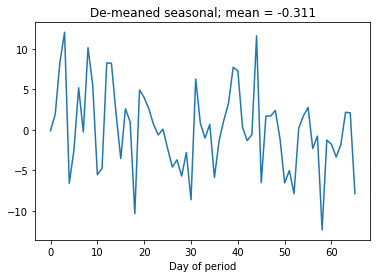

In [17]:
## VOLATIL, non-square

train_series = train.VOLATIL*1E4
test_series = test.VOLATIL*1E4

baseline, mean, weekly_seasonal, quarterly_seasonal, df = \
    fit_and_compare_all(train_series, test_series)
    
## Plot and results
plot_RMSE(baseline.val_costs, 'Validation RMSE')
plot_RMSE(baseline.tr_costs, 'Train RMSE')
plot_baseline(baseline)

plot_seasonal(weekly_seasonal)
plot_seasonal(quarterly_seasonal)

df

/Users/enzo/anaconda3/lib/python3.6/site-packages/scipy/sparse/base.py:541: RuntimeWarning: divide by zero encountered in double_scalars
  return self.astype(np.float_)._mul_scalar(1./other)


,baseline,weekly_seas,quarterly_seas,mean
train RMSE,18.5193,18.5099,18.4004,18.519920
test RMSE,19.4825,19.4898,19.7612,19.479969


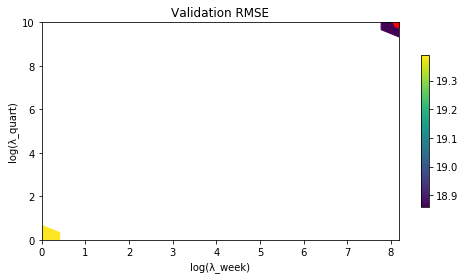

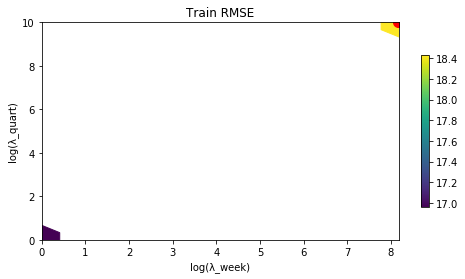

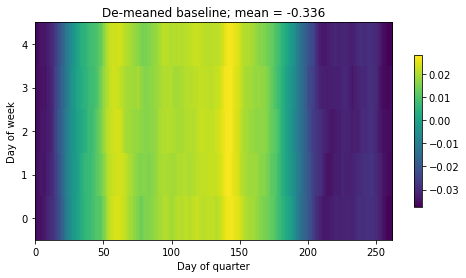

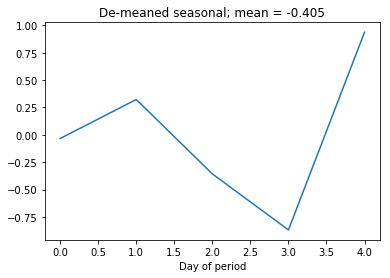

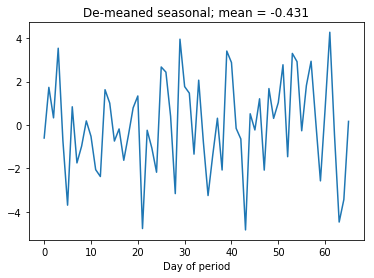

In [18]:
## ROE, non-square

train_series = train.ROE*1E4
test_series = test.ROE*1E4

baseline, mean, weekly_seasonal, quarterly_seasonal, df = \
    fit_and_compare_all(train_series, test_series)
    
## Plot and results
plot_RMSE(baseline.val_costs, 'Validation RMSE')
plot_RMSE(baseline.tr_costs, 'Train RMSE')
plot_baseline(baseline)

plot_seasonal(weekly_seasonal)
plot_seasonal(quarterly_seasonal)

df

/Users/enzo/anaconda3/lib/python3.6/site-packages/scipy/sparse/base.py:541: RuntimeWarning: divide by zero encountered in double_scalars
  return self.astype(np.float_)._mul_scalar(1./other)


,baseline,weekly_seas,quarterly_seas,mean
train RMSE,6.43231,6.6196,6.55356,6.624956
test RMSE,6.94514,6.87809,6.87713,6.884007


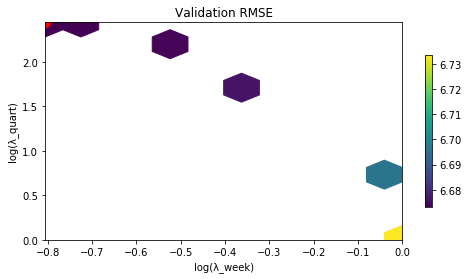

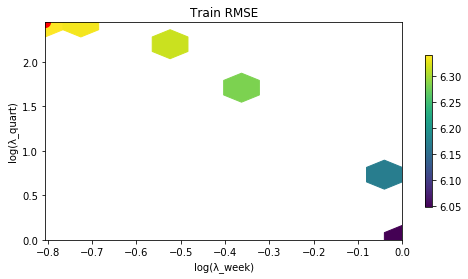

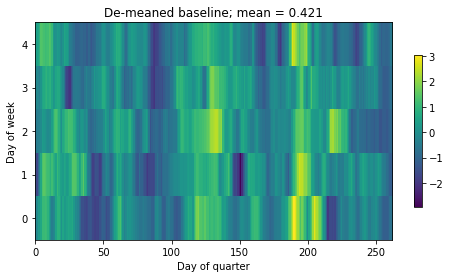

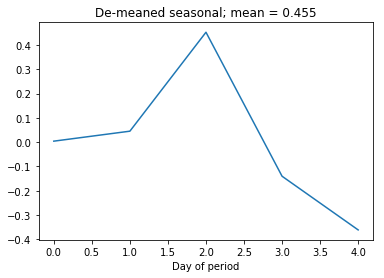

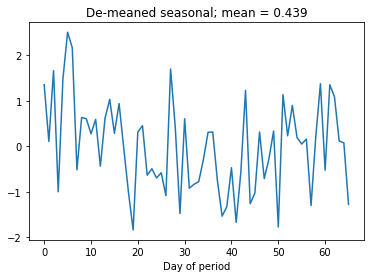

In [19]:
## UDREPS_40_SMOOTHED, non-square

train_series = train.UDREPS_40_SMOOTHED*1E4
test_series = test.UDREPS_40_SMOOTHED*1E4

baseline, mean, weekly_seasonal, quarterly_seasonal, df = \
    fit_and_compare_all(train_series, test_series)
    
## Plot and results
plot_RMSE(baseline.val_costs, 'Validation RMSE')
plot_RMSE(baseline.tr_costs, 'Train RMSE')
plot_baseline(baseline)

plot_seasonal(weekly_seasonal)
plot_seasonal(quarterly_seasonal)

df

/Users/enzo/anaconda3/lib/python3.6/site-packages/scipy/sparse/base.py:541: RuntimeWarning: divide by zero encountered in double_scalars
  return self.astype(np.float_)._mul_scalar(1./other)


,baseline,weekly_seas,quarterly_seas,mean
train RMSE,6.55499,6.54949,6.39768,6.564505
test RMSE,7.35515,7.37569,7.51408,7.354047


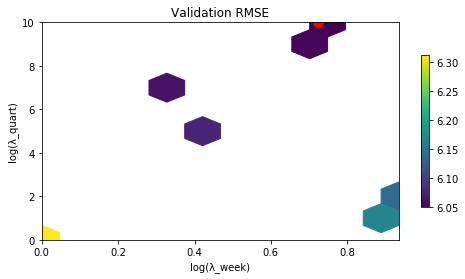

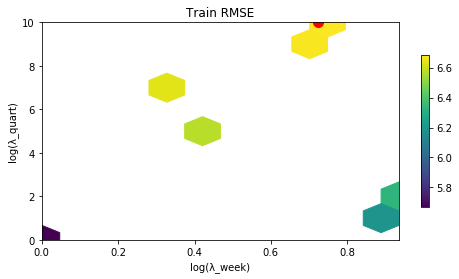

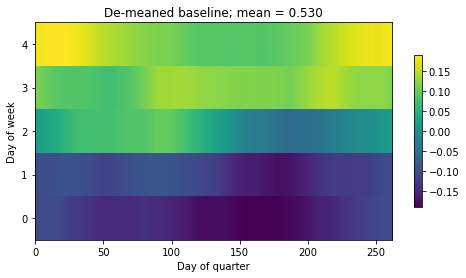

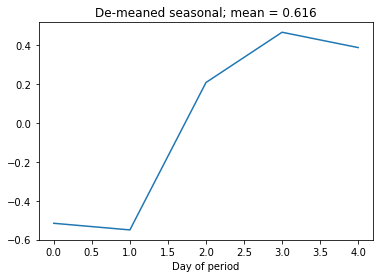

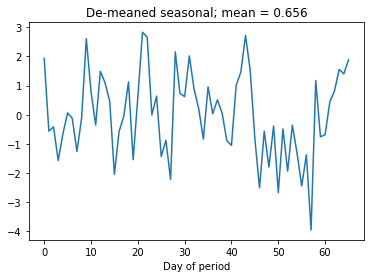

In [20]:
## UTE_SMOOTHED, non-square

train_series = train.UTE_SMOOTHED*1E4
test_series = test.UTE_SMOOTHED*1E4

baseline, mean, weekly_seasonal, quarterly_seasonal, df = \
    fit_and_compare_all(train_series, test_series)
    
## Plot and results
plot_RMSE(baseline.val_costs, 'Validation RMSE')
plot_RMSE(baseline.tr_costs, 'Train RMSE')
plot_baseline(baseline)

plot_seasonal(weekly_seasonal)
plot_seasonal(quarterly_seasonal)

df

/Users/enzo/anaconda3/lib/python3.6/site-packages/scipy/sparse/base.py:541: RuntimeWarning: divide by zero encountered in double_scalars
  return self.astype(np.float_)._mul_scalar(1./other)


,baseline,weekly_seas,quarterly_seas,mean
train RMSE,968.962,978.703,969.769,979.438993
test RMSE,1085.9,1085.75,1091.69,1087.331051


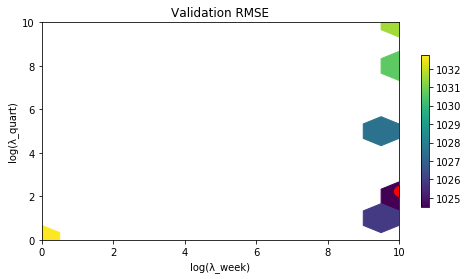

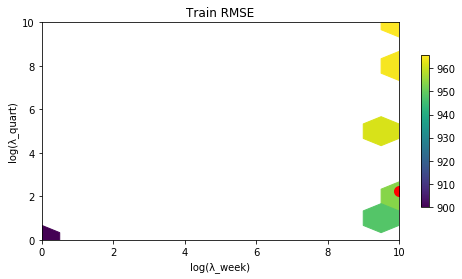

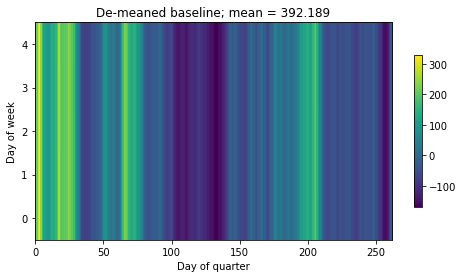

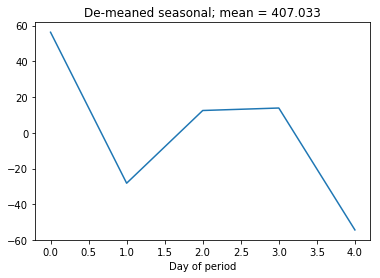

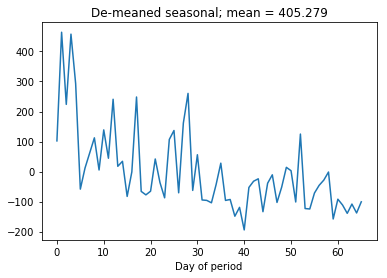

In [21]:
## MOMENTUM, squared
train_series = (train.MOMENTUM*1E4)**2
test_series = (test.MOMENTUM*1E4)**2

baseline, mean, weekly_seasonal, quarterly_seasonal, df = \
    fit_and_compare_all(train_series, test_series)
    
## Plot and results
plot_RMSE(baseline.val_costs, 'Validation RMSE')
plot_RMSE(baseline.tr_costs, 'Train RMSE')
plot_baseline(baseline)

plot_seasonal(weekly_seasonal)
plot_seasonal(quarterly_seasonal)

df

/Users/enzo/anaconda3/lib/python3.6/site-packages/scipy/sparse/base.py:541: RuntimeWarning: divide by zero encountered in double_scalars
  return self.astype(np.float_)._mul_scalar(1./other)


,baseline,weekly_seas,quarterly_seas,mean
train RMSE,377.436,377.501,375.202,377.538469
test RMSE,306.651,306.447,312.351,306.716354


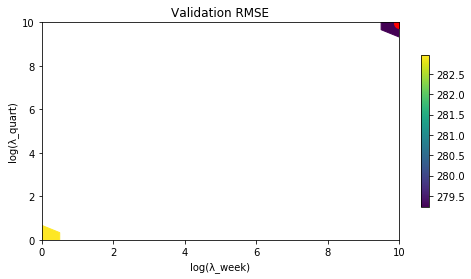

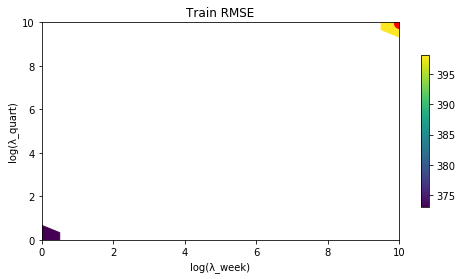

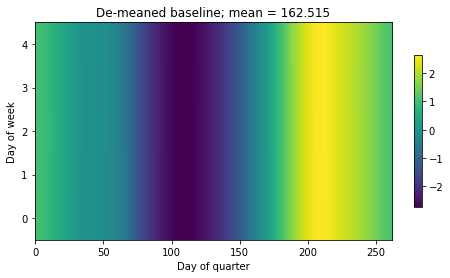

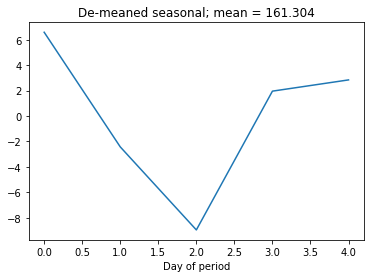

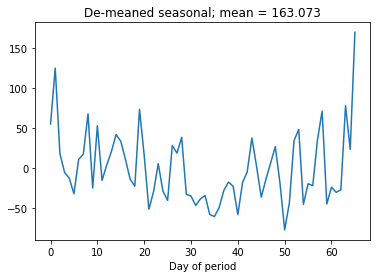

In [22]:
## SIZE, squared

train_series = (train.SIZE*1E4)**2
test_series = (test.SIZE*1E4)**2

baseline, mean, weekly_seasonal, quarterly_seasonal, df = \
    fit_and_compare_all(train_series, test_series)
    
## Plot and results
plot_RMSE(baseline.val_costs, 'Validation RMSE')
plot_RMSE(baseline.tr_costs, 'Train RMSE')
plot_baseline(baseline)

plot_seasonal(weekly_seasonal)
plot_seasonal(quarterly_seasonal)

df